# U.S. Car Accident Analysis

## Introduction

The purpose of this analysis is to research into the causes of car accidents, specifically how weather and time may affect the average severity and/or traffic distance built up. 

According to a study published within the American Meteorological Society, researches conducted a study on 125,012 crashes and weather between 2006 - 2011 in the US on whether there is a correlation to the chance of deadly car crashes. They found that there is a 34% increased chance of a fatal accident happening when precipitation is falling. By mapping data to time, location, and weather, they could analyze the intensity. Light precipitation increased fatality by 27% and doubled to 54% during heavy precipitation.

Study: https://www.washingtonpost.com/weather/2019/04/24/study-rain-increases-risk-fatal-car-crashes-by-percent/

Does these findings carry on into years after 2011?

This data was accessed from Kaggle: https://www.kaggle.com/sobhanmoosavi/us-accidents 

## 1. Data and Library Import 

In [1]:
# !pip install seaborn==0.9.0
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import math
from scipy import stats
from sqlalchemy import create_engine
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data into a dataframe
df_accidents = pd.read_csv("US_Accidents.csv")

In [3]:
pd.set_option('display.max_rows', None)
df_accidents.head(50)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


## 2. Data Cleaning 

In [4]:
# Data info shows null values are present
df_accidents.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     2974335 non-null  object 
 1   Source                 2974335 non-null  object 
 2   TMC                    2246264 non-null  float64
 3   Severity               2974335 non-null  int64  
 4   Start_Time             2974335 non-null  object 
 5   End_Time               2974335 non-null  object 
 6   Start_Lat              2974335 non-null  float64
 7   Start_Lng              2974335 non-null  float64
 8   End_Lat                728071 non-null   float64
 9   End_Lng                728071 non-null   float64
 10  Distance(mi)           2974335 non-null  float64
 11  Description            2974334 non-null  object 
 12  Number                 1056730 non-null  float64
 13  Street                 2974335 non-null  object 
 14  Side              

In [5]:
#Drop rows not used
df_accidents = df_accidents.drop(['End_Lat', 'End_Lng', 'Number', 'Source', 'TMC', 'Side', 'Start_Lat', 'Start_Lng', 'Description', 'Zipcode', 'County', 'Airport_Code', 'Wind_Chill(F)', 'Wind_Direction', 'Weather_Timestamp', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)'], axis=1)

In [6]:
df_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,OH,US,US/Eastern,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,OH,US,US/Eastern,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,State Route 32,Williamsburg,OH,US,US/Eastern,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,I-75 S,Dayton,OH,US,US/Eastern,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Miamisburg Centerville Rd,Dayton,OH,US,US/Eastern,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
#Convert Start_Time to date time instead of object
df_accidents['Start_Time'] = pd.to_datetime(df_accidents['Start_Time'])

In [8]:
# Convert End_Time to date time instead of object
df_accidents['End_Time'] = pd.to_datetime(df_accidents['End_Time'])

In [9]:
# Extract start date into a new column from Start_Time
df_accidents['Date_Start'] = df_accidents['Start_Time'].dt.date

In [10]:
# Convert Time_Start column to time
df_accidents['Time_Start'] = df_accidents['Start_Time'].dt.time

In [11]:
# Extract and convert Start_Time into a new column but in the form of military hours
df_accidents['Military_time_bin_filter'] = df_accidents['Start_Time'].dt.hour
df_accidents.tail()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter
2974330,A-2974354,2,2019-08-23 18:03:25,2019-08-23 18:32:01,0.543,Pomona Fwy E,Riverside,CA,US,US/Pacific,...,False,False,False,Day,Day,Day,Day,2019-08-23,18:03:25,18
2974331,A-2974355,2,2019-08-23 19:11:30,2019-08-23 19:38:23,0.338,I-8 W,San Diego,CA,US,US/Pacific,...,False,False,False,Day,Day,Day,Day,2019-08-23,19:11:30,19
2974332,A-2974356,2,2019-08-23 19:00:21,2019-08-23 19:28:49,0.561,Garden Grove Fwy,Orange,CA,US,US/Pacific,...,False,False,False,Day,Day,Day,Day,2019-08-23,19:00:21,19
2974333,A-2974357,2,2019-08-23 19:00:21,2019-08-23 19:29:42,0.772,San Diego Fwy S,Culver City,CA,US,US/Pacific,...,False,False,False,Day,Day,Day,Day,2019-08-23,19:00:21,19
2974334,A-2974358,2,2019-08-23 18:52:06,2019-08-23 19:21:31,0.537,CA-210 W,Highland,CA,US,US/Pacific,...,False,False,False,Day,Day,Day,Day,2019-08-23,18:52:06,18


In [12]:
# Repeat process above with Date_End
df_accidents['Date_End'] = df_accidents['End_Time'].dt.date
df_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,OH,US,US/Eastern,...,False,False,Night,Night,Night,Night,2016-02-08,05:46:00,5,2016-02-08
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,OH,US,US/Eastern,...,False,False,Night,Night,Night,Day,2016-02-08,06:07:59,6,2016-02-08
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,State Route 32,Williamsburg,OH,US,US/Eastern,...,True,False,Night,Night,Day,Day,2016-02-08,06:49:27,6,2016-02-08
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,I-75 S,Dayton,OH,US,US/Eastern,...,False,False,Night,Day,Day,Day,2016-02-08,07:23:34,7,2016-02-08
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Miamisburg Centerville Rd,Dayton,OH,US,US/Eastern,...,True,False,Day,Day,Day,Day,2016-02-08,07:39:07,7,2016-02-08


In [13]:
df_accidents['Time_End'] = df_accidents['End_Time'].dt.time
df_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,OH,US,US/Eastern,...,False,Night,Night,Night,Night,2016-02-08,05:46:00,5,2016-02-08,11:00:00
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,OH,US,US/Eastern,...,False,Night,Night,Night,Day,2016-02-08,06:07:59,6,2016-02-08,06:37:59
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,State Route 32,Williamsburg,OH,US,US/Eastern,...,False,Night,Night,Day,Day,2016-02-08,06:49:27,6,2016-02-08,07:19:27
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,I-75 S,Dayton,OH,US,US/Eastern,...,False,Night,Day,Day,Day,2016-02-08,07:23:34,7,2016-02-08,07:53:34
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Miamisburg Centerville Rd,Dayton,OH,US,US/Eastern,...,False,Day,Day,Day,Day,2016-02-08,07:39:07,7,2016-02-08,08:09:07


In [14]:
# Create new column with the length if each accident
df_accidents['Time_Duration'] = df_accidents['End_Time'].values - df_accidents['Start_Time'].values
df_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,OH,US,US/Eastern,...,Night,Night,Night,Night,2016-02-08,05:46:00,5,2016-02-08,11:00:00,05:14:00
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,OH,US,US/Eastern,...,Night,Night,Night,Day,2016-02-08,06:07:59,6,2016-02-08,06:37:59,00:30:00
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,State Route 32,Williamsburg,OH,US,US/Eastern,...,Night,Night,Day,Day,2016-02-08,06:49:27,6,2016-02-08,07:19:27,00:30:00
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,I-75 S,Dayton,OH,US,US/Eastern,...,Night,Day,Day,Day,2016-02-08,07:23:34,7,2016-02-08,07:53:34,00:30:00
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Miamisburg Centerville Rd,Dayton,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-08,07:39:07,7,2016-02-08,08:09:07,00:30:00


In [15]:
# Drop all NaN values / check
df_accidents = df_accidents.dropna(how='any')
df_accidents.isnull().values.any()

False

In [16]:
# Confirm same non-null count
df_accidents.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2891830 entries, 0 to 2974334
Data columns (total 36 columns):
 #   Column                    Non-Null Count    Dtype          
---  ------                    --------------    -----          
 0   ID                        2891830 non-null  object         
 1   Severity                  2891830 non-null  int64          
 2   Start_Time                2891830 non-null  datetime64[ns] 
 3   End_Time                  2891830 non-null  datetime64[ns] 
 4   Distance(mi)              2891830 non-null  float64        
 5   Street                    2891830 non-null  object         
 6   City                      2891830 non-null  object         
 7   State                     2891830 non-null  object         
 8   Country                   2891830 non-null  object         
 9   Timezone                  2891830 non-null  object         
 10  Temperature(F)            2891830 non-null  float64        
 11  Visibility(mi)            2891830 non

## 3A. Exploratory Analysis 

In [17]:
# Descriptive stats on data 
df_accidents.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,2.891830e+06,2.891830e+06,2.891830e+06,2.891830e+06,2.891830e+06,2891830
mean,2.358299e+00,2.824016e-01,6.238924e+01,9.149014e+00,1.211528e+01,0 days 01:57:31.584958
std,5.402403e-01,1.534803e+00,1.876849e+01,2.874234e+00,5.091449e+00,2 days 07:28:28.020970
min,1.000000e+00,0.000000e+00,-4.000000e+01,0.000000e+00,0.000000e+00,-1 days +23:25:55
25%,2.000000e+00,0.000000e+00,5.000000e+01,1.000000e+01,8.000000e+00,0 days 00:29:43
50%,2.000000e+00,0.000000e+00,6.440000e+01,1.000000e+01,1.200000e+01,0 days 00:44:35
75%,3.000000e+00,1.000000e-02,7.600000e+01,1.000000e+01,1.600000e+01,0 days 01:14:41
max,4.000000e+00,3.336300e+02,1.706000e+02,1.400000e+02,2.300000e+01,1061 days 02:53:22


In [18]:
# list the unique weather conditions recorded in data accross the US
df_accidents['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Light Rain / Windy', 'Hail', 'Heavy Drizzle',
       'Showers in the Vicinity', 'Light Rain Shower',
       'Light Rain with Thunder', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunderstorm', 'Thunder',
       'Heavy T-Storm', 'Funnel Cloud', 'Heavy T-Storm / Windy',
       'Blowing Snow', 'Light Thunderstorms and Snow', 'Hea

### 3B. Analysis looking into CA

In [19]:
# Info on data (CA)
ca_accidents = df_accidents.iloc[(df_accidents['State'] == 'CA').values]
ca_accidents.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,644208.000000,644208.000000,644208.000000,644208.000000,644208.000000,644208
mean,2.337462,0.123907,65.697142,9.170586,12.464036,0 days 01:34:56.383363
std,0.493310,0.649336,12.458758,2.231458,5.577509,0 days 18:40:23.731690
min,1.000000,0.000000,-29.900000,0.000000,0.000000,-1 days +23:29:10
25%,2.000000,0.000000,57.000000,10.000000,8.000000,0 days 00:29:45
50%,2.000000,0.000000,64.400000,10.000000,13.000000,0 days 00:44:35
75%,3.000000,0.010000,73.400000,10.000000,17.000000,0 days 01:14:00
max,4.000000,227.210007,127.400000,140.000000,23.000000,438 days 09:56:44


In [20]:
# Count of the number of accidents recorded in cities within all of CA
ca_accidents['City'].value_counts().head(100)

Los Angeles         65354
Sacramento          25479
San Diego           20923
San Jose            17224
Oakland             11598
Riverside           10204
Long Beach           9722
San Francisco        8308
Anaheim              8290
San Bernardino       7341
Corona               6781
Whittier             6363
Ontario              6205
Hayward              5587
Baldwin Park         4793
Irvine               4622
Gardena              4568
Fresno               4265
Tracy                4251
Pomona               4199
Fremont              4192
Sherman Oaks         4052
Bakersfield          4023
Livermore            3867
Santa Rosa           3865
Stockton             3742
Downey               3712
Santa Ana            3662
Cerritos             3639
Diamond Bar          3625
Los Gatos            3606
Orange               3396
Fairfield            3344
Inglewood            3331
San Mateo            3281
Fontana              3170
Rowland Heights      3071
Norwalk              3050
West Covina 

### 3C. Analysis looking into cities around SF Bay Area

In [21]:
# Create dataframe to filter only main cities surrounding SF Bay Area
bay_area = (df_accidents['State'] == 'CA') & (df_accidents['City'].isin([
'Alameda',
'Albany',
'American Canyon',
'Antioch',
'Altherton',
'Belmont',
'Belvedere',
'Benicia',
'Berkeley',
'Brentwood',
'Brisbane',
'Burlingame',
'Calistoga',
'Campbell',
'Clayton',
'Cloverdale',
'Colma',    
'Concord',
'Cotati',
'Corte Madera',
'Cupertino',
'Daly City',
'Danville',
'Dixon',
'Dublin',
'East Palo Alto',
'El Cerrito',
'Emeryville',
'Fairfield',
'Foster City',
'Fremont',
'Gilroy',
'Half Moon Bay',
'Hayward',
'Healdsburg',
'Hercules',
'Hillsborough',
'Lafayette',
'Larkspur',
'Livermore',
'Los Altos',
'Los Altos Hills',
'Los Gatos',
'Martinez',
'Menlo Park',
'Mill Valley',
'Millbrae',
'Milpitas',
'Monte Sereno',
'Morgan Hill',
'Moraga',
'Mountain View',
'Napa',
'Newark',
'Novato',
'Oakland',
'Oakley',
'Orinda',
'Pacifica',
'Palo Alto',
'Petaluma',
'Pinole',
'Pittsburg',
'Pleasant Hill',
'Pleasanton',
'Portola Valley',
'Redwood City',
'Richmond',
'Rio Vista',
'Ross',
'Rohnert Park',
'San Anselmo',
'St. Helena',
'San Bruno',
'San Carlos',
'San Francisco',
'San Jose',
'San Leandro',
'San Mateo',
'San Pablo',
'San Rafael',
'San Ramon',
'Santa Clara',
'Santa Rosa',
'Saratoga',
'Sausalito',
'Sebastopol',
'Sonoma',
'South San Francisco',
'Suisun City',
'Sunnyvale',
'Tiburon',
'Union City',
'Vacaville',
'Vallejo'
'Walnut Creek',
'Windsor',
'Woodside',
'Yountville']))
bay_area_cities = df_accidents.iloc[bay_area.values]
bay_area_cities.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
729,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,0.0,I-880 N,Hayward,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:30:16,10,2016-06-21,11:16:39,00:46:23
731,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,0.0,N De Anza Blvd,Cupertino,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:41:42,10,2016-06-21,11:11:42,00:30:00
732,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,0.0,Norman Y Mineta Hwy,San Jose,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:16:26,10,2016-06-21,11:04:16,00:47:50
733,A-734,3,2016-06-21 10:31:06,2016-06-21 11:16:26,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:31:06,10,2016-06-21,11:16:26,00:45:20
734,A-735,3,2016-06-21 10:17:17,2016-06-21 11:03:50,0.0,I-280 S,San Jose,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:17:17,10,2016-06-21,11:03:50,00:46:33


In [22]:
# Count of the weather conditions present during car accidents in the SF Bay Area
bay_area_cities['Weather_Condition'].value_counts().head(60)

Clear                           39757
Partly Cloudy                   18163
Mostly Cloudy                   17251
Fair                            16630
Overcast                        14617
Scattered Clouds                 8370
Light Rain                       6457
Cloudy                           5134
Haze                             2720
Rain                             1633
Fog                               879
Smoke                             708
Heavy Rain                        449
Fair / Windy                      404
Partly Cloudy / Windy             128
Light Drizzle                     113
Mist                              101
Patches of Fog                     89
Shallow Fog                        85
Mostly Cloudy / Windy              76
Light Rain / Windy                 61
Cloudy / Windy                     41
Showers in the Vicinity            41
Heavy Rain / Windy                 16
Rain / Windy                       13
Light Thunderstorms and Rain        9
Rain Showers

In [23]:
# Count of how many accidents occured in each SF Bay Area city
bay_area_cities['City'].value_counts().head(20)

San Jose         17224
Oakland          11598
San Francisco     8308
Hayward           5587
Fremont           4192
Livermore         3867
Santa Rosa        3865
Los Gatos         3606
Fairfield         3344
San Mateo         3281
San Leandro       2878
Redwood City      2847
Pleasanton        2704
Concord           2432
Berkeley          2405
Richmond          2350
Petaluma          2024
Emeryville        1925
Pittsburg         1867
Napa              1791
Name: City, dtype: int64

#### Which cities in the SF Bay Area have the lowest and highest average severity ratings?

In [24]:
# Descriptive stats on data (SF Bay Area)
bay_area_cities.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,133976.000000,133976.000000,133976.000000,133976.000000,133976.000000,133976
mean,2.345719,0.138044,61.380709,9.258725,12.149258,0 days 01:38:36.775467
std,0.492064,0.533735,10.755121,2.016170,5.713484,0 days 10:02:07.973451
min,1.000000,0.000000,23.000000,0.000000,0.000000,-1 days +23:29:41
25%,2.000000,0.000000,54.000000,10.000000,8.000000,0 days 00:29:40
50%,2.000000,0.000000,60.100000,10.000000,12.000000,0 days 00:39:33
75%,3.000000,0.010000,67.000000,10.000000,17.000000,0 days 01:14:48
max,4.000000,21.200001,113.000000,36.000000,23.000000,91 days 10:45:47


In [25]:
# Min, max, and mean car accident traffic severity by SF Bay Area cities
grouped_city_bay_area = bay_area_cities.groupby('City').agg({'Severity': ['mean', 'min', 'max']})
grouped_city_bay_area.columns = ['Severity Avg', 'Severity Min', 'Severity Max']
grouped_city_bay_area = grouped_city_bay_area.reset_index()
grouped_city_bay_area.head(10) 

,City,Severity Avg,Severity Min,Severity Max
0,Alameda,2.125000,2,4
1,Albany,2.000000,2,2
2,American Canyon,2.391791,1,4
3,Antioch,2.047032,2,4
4,Belmont,2.262948,2,4
5,Benicia,2.626750,2,4
6,Berkeley,2.676923,1,4
7,Brentwood,2.075949,2,4
8,Brisbane,2.049708,2,3
9,Burlingame,2.229750,2,4


In [26]:
# Top 5 cities around the Bay Area averaging highest severities
highest_avg_severity_cities_bay_area = grouped_city_bay_area.sort_values(by='Severity Avg', ascending=False)
highest_avg_severity_cities_bay_area.head(5)

,City,Severity Avg,Severity Min,Severity Max
34,Hillsborough,3.000000,2,4
24,El Cerrito,2.731481,2,4
6,Berkeley,2.676923,1,4
59,Pinole,2.630241,2,4
5,Benicia,2.626750,2,4


In [27]:
# Top 5 cities around the Bay Area averaging lowest severities
lowest_avg_severity_cities_bay_area = grouped_city_bay_area.sort_values(by='Severity Avg', ascending=True)
lowest_avg_severity_cities_bay_area.head(5)

,City,Severity Avg,Severity Min,Severity Max
91,Yountville,2.0,2,2
47,Moraga,2.0,2,2
68,San Anselmo,2.0,2,2
46,Monte Sereno,2.0,2,2
1,Albany,2.0,2,2


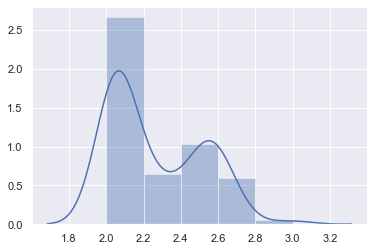

In [28]:
#Average overall severity levels distribution within SF Bay Area

grouped_city_bay_area = bay_area_cities.groupby('City').agg({'Severity': ['mean']})
ax = sns.distplot(grouped_city_bay_area)

* Distribution seems to be skewed right

#### Which cities in the SF Bay Area have the shortest and longest average traffic distance buildup?

In [29]:
# Min, max, and mean car accident traffic distances(miles) by SF Bay Area cities
grouped_city_bay_area2 = bay_area_cities.groupby('City').agg({'Distance(mi)': ['mean', 'min', 'max']})
grouped_city_bay_area2.columns = ['Distance Avg', 'Distance Min', 'Distance Max']
grouped_city_bay_area2 = grouped_city_bay_area2.reset_index()
grouped_city_bay_area2.head(10) 

,City,Distance Avg,Distance Min,Distance Max
0,Alameda,0.144813,0.0,0.787
1,Albany,0.005000,0.0,0.010
2,American Canyon,0.118882,0.0,3.930
3,Antioch,0.144162,0.0,5.620
4,Belmont,0.147582,0.0,2.530
5,Benicia,0.129914,0.0,3.500
6,Berkeley,0.100580,0.0,2.180
7,Brentwood,0.111766,0.0,7.110
8,Brisbane,0.144237,0.0,1.876
9,Burlingame,0.144614,0.0,4.520


In [30]:
# Top 5 cities around the SF Bay Area averaging longest traffic buildups
highest_avg_distance_cities_bay_area2 = grouped_city_bay_area2.sort_values(by='Distance Avg', ascending=False)
highest_avg_distance_cities_bay_area2.head(5)

,City,Distance Avg,Distance Min,Distance Max
39,Los Altos Hills,0.477500,0.0,1.720000
74,San Mateo,0.410563,0.0,20.990000
66,Rio Vista,0.259949,0.0,11.130000
31,Hayward,0.240068,0.0,18.799999
34,Hillsborough,0.212333,0.0,0.515000


In [31]:
# Top 5 cities around the SF Bay Area averaging shortest traffic buildups
lowest_avg_distance_cities_bay_area2 = grouped_city_bay_area2.sort_values(by='Distance Avg', ascending=True)
lowest_avg_distance_cities_bay_area2.head(5)

,City,Distance Avg,Distance Min,Distance Max
46,Monte Sereno,0.00300,0.00,0.023
68,San Anselmo,0.00375,0.00,0.035
1,Albany,0.00500,0.00,0.010
91,Yountville,0.00574,0.00,0.257
47,Moraga,0.01000,0.01,0.010


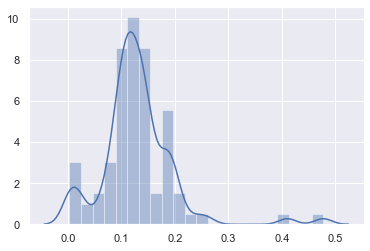

In [32]:
#Average overall traffic length distribution within SF Bay Area
group_city_bay_area2 = bay_area_cities.groupby('City').agg({'Distance(mi)': ['mean']})
ax = sns.distplot(group_city_bay_area2)

* Distribution skewed right

### 3C. Analysis looking into cities around LA/OC Area

In [33]:
# Create a data frame filtering in only the main cities around Los Angeles / Orange County Area
la_oc = (df_accidents['State'] == 'CA') & (df_accidents['City'].isin([
'Acton',
'Altadena',
'Agoura Hills', 
'Alhambra',   
'Arcadia', 
'Artesia',
'Avalon', 
'Azusa', 
'Baldwin Park', 
'Bell Gardens', 
'Bell',
'Bellflower', 
'Beverly Hills', 
'Bradbury', 
'Burbank', 
'Calabasas',
'Canoga Park',
'Canyon Country',
'Carson', 
'Castaic',
'Cerritos', 
'Chatsworth',
'Chino',
'Claremont', 
'Commerce', 
'Compton', 
'Covina', 
'Cudahy', 
'Culver City', 
'Diamond Bar', 
'Downey', 
'Duarte', 
'El Monte', 
'El Segundo', 
'Gardena',
'Glendale',
'Glendora', 
'Hawaiian Gardens', 
'Hawthorne', 
'Harbor City',
'Hermosa Beach', 
'Hidden Hills',
'Huntington Beach', 
'Industry', 
'Inglewood', 
'Irwindale', 
'La Canada Flintridge', 
'La Crescenta',
'La Habra Heights', 
'La Mirada', 
'La Puente', 
'La Verne', 
'Lakewood', 
'Lake Hughes',
'Lancaster', 
'Lawndale', 
'Lomita',
'Long Beach',
'Los Angeles',
'Lynwood',
'Malibu',
'Manhattan Beach',
'Maywood',
'Monrovia',
'Montebello',
'Monterey Park',
'Montrose',
'Mount Wilson',
'Norwalk',
'Newhall',
'Northridge',
'North Hills',
'North Hollywood',
'Ontario',
'Pacoima',
'Pacific Palisades',
'Palmdale',
'Palos Verdes Peninsula',
'Palos Verdes Estates',
'Panorama City',
'Paramount',
'Pasadena',
'Pearblossom',
'Pico Rivera',
'Playa Del Rey',
'Playa Vista',
'Pomona',
'Porter Ranch',
'Rancho Palos Verdes',
'Redondo Beach',
'Reseda',
'Rolling Hills Estates',
'Rolling Hills',
'Rosemead',
'San Dimas',
'San Fernando',
'San Gabriel',
'San Marino',
'San Pedro',
'Santa Clarita',
'Santa Fe Springs',
'Santa Monica',
'Sherman Oaks',
'Sierra Madre',
'Signal Hills',
'South El Monte',
'South Gate',
'South Pasadena',
'Stevenson Ranch',
'Studio City',
'Sun Valley',
'Sunland',
'Sylmar',
'Tarzana',
'Temple City',
'Topanga',
'Torrance',
'Tujunga',
'Valencia',
'Valley Village',
'Valyermo',
'Van Nuys',
'Venice',
'Vernon',
'Verdugo City',
'Walnut', 
'West Covina', 
'West Hills',
'West Hollywood', 
'Westlake Village', 
'Whittier',
'Woodland Hills',
'Wilmington',
'Winnetka',
'Aliso Viejo',
'Anaheim',
'Brea',
'Buena Park',
'Costa Mesa',
'Cypress',
'Dana Point',
'Fountain Valley',
'Fullerton',
'Garden Grove',
'Huntington Beach',
'Irvine',
'La Habra',
'La Palma',
'Laguna Beach',
'Laguna Hills',
'Laguna Niguel',
'Laguna Woods',
'Lake Forest',
'Los Alamitos',
'Mission Viejo',
'Newport Beach',
'Orange',
'Placentia',
'Rancho Santa Margarita',
'San Clemente',
'San Juan Capistrano',
'Santa Ana',
'Seal Beach',
'Stanton',
'Tustin',
'Villa Park',
'Westminster',
'Yorba Linda']))
la_oc_cities = df_accidents.iloc[la_oc.values]
la_oc_cities.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
42864,A-42865,3,2016-06-21 10:44:51,2016-06-21 11:24:00,0.0,I-5 N,Sylmar,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:44:51,10,2016-06-21,11:24:00,00:39:09
42865,A-42866,2,2016-06-21 10:44:12,2016-06-21 11:22:00,0.0,CA-170 S,North Hollywood,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:44:12,10,2016-06-21,11:22:00,00:37:48
42866,A-42867,2,2016-06-21 10:46:30,2016-06-21 11:27:00,0.0,US-101 N,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:46:30,10,2016-06-21,11:27:00,00:40:30
42867,A-42868,3,2016-06-21 10:49:21,2016-06-21 11:34:21,0.0,Golden State Fwy S,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:49:21,10,2016-06-21,11:34:21,00:45:00
42869,A-42870,2,2016-06-21 10:43:39,2016-06-21 11:28:39,0.0,Pomona Fwy W,South El Monte,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:43:39,10,2016-06-21,11:28:39,00:45:00


In [34]:
# Count of how many accidents occured within cities around the LA/OC Area cities
la_oc_cities['City'].value_counts().head(20)

Los Angeles     65354
Long Beach       9722
Anaheim          8290
Whittier         6363
Ontario          6205
Baldwin Park     4793
Irvine           4622
Gardena          4568
Pomona           4199
Sherman Oaks     4052
Downey           3712
Santa Ana        3662
Cerritos         3639
Diamond Bar      3625
Orange           3396
Inglewood        3331
Norwalk          3050
West Covina      2886
La Puente        2872
Compton          2858
Name: City, dtype: int64

#### Which cities in the LA/OC Area have the lowest and highest average severity ratings?

In [35]:
# Descriptive stats on data (LA / OC Area)
la_oc_cities.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,256943.000000,256943.000000,256943.000000,256943.000000,256943.000000,256943
mean,2.405016,0.119373,67.819855,9.206773,12.493312,0 days 01:38:24.047590
std,0.510477,0.477397,10.786226,1.912446,5.693671,1 days 02:29:09.155086
min,1.000000,0.000000,-29.900000,0.000000,0.000000,-1 days +23:29:10
25%,2.000000,0.000000,60.100000,10.000000,8.000000,0 days 00:29:47
50%,2.000000,0.000000,66.900000,10.000000,13.000000,0 days 00:44:37
75%,3.000000,0.010000,75.000000,10.000000,17.000000,0 days 01:12:33
max,4.000000,137.618000,114.800000,60.000000,23.000000,438 days 09:56:44


In [36]:
# Min, max, and mean car accident traffic severity by LA/OC Area cities
grouped_city_la_oc = la_oc_cities.groupby('City').agg({'Severity': ['mean', 'min', 'max']})
grouped_city_la_oc.columns = ['Severity Avg', 'Severity Min', 'Severity Max']
grouped_city_la_oc = grouped_city_la_oc.reset_index()
grouped_city_la_oc.head(10)

,City,Severity Avg,Severity Min,Severity Max
0,Acton,2.066307,1,4
1,Agoura Hills,2.107198,2,4
2,Alhambra,2.663669,2,4
3,Aliso Viejo,2.040000,2,3
4,Anaheim,2.160314,2,4
5,Arcadia,2.575066,2,4
6,Artesia,2.058319,2,4
7,Azusa,2.530140,2,4
8,Baldwin Park,2.672856,2,4
9,Bell,2.000000,2,2


In [37]:
# Top 5 cities around the LA/OC averaging highest severities
highest_avg_severity_cities_la_oc = grouped_city_la_oc.sort_values(by='Severity Avg', ascending=False)
highest_avg_severity_cities_la_oc.head(5)

,City,Severity Avg,Severity Min,Severity Max
47,Hermosa Beach,3.333333,2,4
31,Cypress,2.900000,2,4
75,Manhattan Beach,2.857143,2,4
64,Lake Forest,2.699267,2,4
71,Los Alamitos,2.681140,2,4


In [38]:
# Top 5 cities around the LA/OC averaging lowest severities
lowest_avg_severity_cities_la_oc = grouped_city_la_oc.sort_values(by='Severity Avg', ascending=True)
lowest_avg_severity_cities_la_oc.head(5)

,City,Severity Avg,Severity Min,Severity Max
153,Winnetka,1.96,1,2
108,Rolling Hills Estates,2.00,2,2
86,Northridge,2.00,2,2
29,Cudahy,2.00,2,2
93,Palos Verdes Estates,2.00,2,2


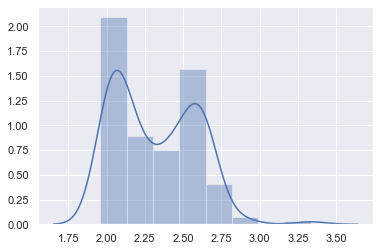

In [39]:
#Average overall severity levels distribution LA/OC Area
group_city = la_oc_cities.groupby('City').agg({'Severity': ['mean']})
ax = sns.distplot(group_city)

* Distribution seems to skew right

#### Which cities in the LA/OC Area have the shortest and longest average traffic distance buildup?

In [40]:
# Min, max, and mean car accident traffic distances(miles) by LA/OC Area cities
grouped_city_la_oc2 = la_oc_cities.groupby('City').agg({'Distance(mi)': ['mean', 'min', 'max']})
grouped_city_la_oc2.columns = ['Distance Avg', 'Distance Min', 'Distance Max']
grouped_city_la_oc2 = grouped_city_la_oc2.reset_index()
grouped_city_la_oc2.head(10)

,City,Distance Avg,Distance Min,Distance Max
0,Acton,0.206463,0.0,9.700
1,Agoura Hills,0.161891,0.0,6.590
2,Alhambra,0.096794,0.0,1.804
3,Aliso Viejo,0.143780,0.0,1.890
4,Anaheim,0.159673,0.0,10.090
5,Arcadia,0.145034,0.0,2.035
6,Artesia,0.086535,0.0,1.790
7,Azusa,0.129925,0.0,6.370
8,Baldwin Park,0.111989,0.0,4.363
9,Bell,0.030526,0.0,0.215


In [41]:
# Top 5 cities around LA/OC averaging longest traffic buildups
highest_avg_distance_cities_la_oc2 = grouped_city_la_oc2.sort_values(by='Distance Avg', ascending=False)
highest_avg_distance_cities_la_oc2.head(5)

,City,Distance Avg,Distance Min,Distance Max
140,Valyermo,1.255096,0.0,22.410
69,Lomita,0.678500,0.0,7.584
104,Rancho Palos Verdes,0.574286,0.0,4.010
75,Manhattan Beach,0.456571,0.0,3.012
155,Yorba Linda,0.395670,0.0,2.660


In [42]:
# Top 5 cities around LA/OC averaging shortest traffic buildups
lowest_avg_distance_cities_la_oc2 = grouped_city_la_oc2.sort_values(by='Distance Avg', ascending=True)
lowest_avg_distance_cities_la_oc2.head(5)

,City,Distance Avg,Distance Min,Distance Max
76,Maywood,0.000000,0.0,0.000
93,Palos Verdes Estates,0.000000,0.0,0.000
101,Playa Vista,0.000000,0.0,0.000
126,Stanton,0.001909,0.0,0.011
48,Hidden Hills,0.002000,0.0,0.010


## 4A. Hypothesis Testing

### SF Bay Area 

In [45]:
# Table consisiting of weather conditions to categorize later
sf_boxplot = (bay_area_cities['Weather_Condition']).str.contains('Rain|Drizzle|Thunderstorms|Fair|Clear', regex=True)
sf_boxplot1 = bay_area_cities.iloc[sf_boxplot.values]
sf_boxplot1.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
729,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,0.0,I-880 N,Hayward,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:30:16,10,2016-06-21,11:16:39,00:46:23
731,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,0.0,N De Anza Blvd,Cupertino,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:41:42,10,2016-06-21,11:11:42,00:30:00
732,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,0.0,Norman Y Mineta Hwy,San Jose,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:16:26,10,2016-06-21,11:04:16,00:47:50
733,A-734,3,2016-06-21 10:31:06,2016-06-21 11:16:26,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:31:06,10,2016-06-21,11:16:26,00:45:20
736,A-737,2,2016-06-21 10:56:00,2016-06-21 11:26:00,0.0,CA-24 W,Orinda,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:56:00,10,2016-06-21,11:26:00,00:30:00


In [46]:
#String match "Fair, Clear, Fair / Windy, Rain, Light Rain, Heavy Rain, etc" into 2 buckets: Not Rain / Rain
sf_boxplot1['Rain_NotRain_Filter'] = np.where(sf_boxplot1['Weather_Condition'].str.contains('Fair|Clear'), 'Not Rain', 'Rain')
sf_boxplot1.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Rain_NotRain_Filter
729,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,0.0,I-880 N,Hayward,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:30:16,10,2016-06-21,11:16:39,00:46:23,Not Rain
731,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,0.0,N De Anza Blvd,Cupertino,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:41:42,10,2016-06-21,11:11:42,00:30:00,Not Rain
732,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,0.0,Norman Y Mineta Hwy,San Jose,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:16:26,10,2016-06-21,11:04:16,00:47:50,Not Rain
733,A-734,3,2016-06-21 10:31:06,2016-06-21 11:16:26,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:31:06,10,2016-06-21,11:16:26,00:45:20,Not Rain
736,A-737,2,2016-06-21 10:56:00,2016-06-21 11:26:00,0.0,CA-24 W,Orinda,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:56:00,10,2016-06-21,11:26:00,00:30:00,Not Rain


In [47]:
# Check how many values in each bin
sf_boxplot1['Rain_NotRain_Filter'].value_counts().head(20)

Not Rain    56791
Rain         8764
Name: Rain_NotRain_Filter, dtype: int64

In [48]:
# Filter rain/drizzle weather
sf_rain_filter = (bay_area_cities['Weather_Condition']).str.contains('Rain|Drizzle|Thunder', regex=True)
sf_rain_accidents = bay_area_cities.iloc[sf_rain_filter.values]
sf_rain_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
958,A-959,3,2016-06-22 23:26:28,2016-06-22 23:56:28,0.00,I-80 W,Fairfield,CA,US,US/Pacific,...,Night,Night,Night,Night,2016-06-22,23:26:28,23,2016-06-22,23:56:28,00:30:00
968,A-969,3,2016-06-23 03:04:28,2016-06-23 04:04:28,0.00,I-80 W,Fairfield,CA,US,US/Pacific,...,Night,Night,Night,Night,2016-06-23,03:04:28,3,2016-06-23,04:04:28,01:00:00
6005,A-6006,3,2016-12-07 12:40:11,2016-12-07 13:09:36,0.01,Warren Ave,Fremont,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-12-07,12:40:11,12,2016-12-07,13:09:36,00:29:25
6006,A-6007,2,2016-12-07 12:43:07,2016-12-07 13:12:44,0.01,Alice St,Oakland,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-12-07,12:43:07,12,2016-12-07,13:12:44,00:29:37
6013,A-6014,2,2016-12-07 13:19:10,2016-12-07 13:47:09,0.01,Trimble Rd,San Jose,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-12-07,13:19:10,13,2016-12-07,13:47:09,00:27:59


In [49]:
# Descriptive stats on accidents occuring in rain conditions within SF Bay Area
sf_rain_accidents.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,8768.000000,8768.000000,8768.000000,8768.00000,8768.000000,8768
mean,2.381729,0.133980,55.029323,5.86161,11.597172,0 days 01:36:02.950045
std,0.498584,0.507128,5.078323,3.04338,6.042106,0 days 02:02:08.898469
min,1.000000,0.000000,35.100000,0.20000,0.000000,0 days 00:20:50
25%,2.000000,0.000000,52.000000,3.00000,7.000000,0 days 00:29:39
50%,2.000000,0.000000,55.000000,6.00000,12.000000,0 days 00:33:29
75%,3.000000,0.010000,58.000000,9.00000,16.000000,0 days 01:13:27
max,4.000000,15.680000,93.000000,10.00000,23.000000,0 days 13:23:49


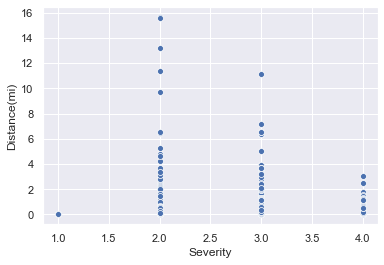

In [50]:
sns.scatterplot(x='Severity', y='Distance(mi)', data=sf_rain_accidents)

In [51]:
# Filter fair/clear weather
sf_clear_filter = (bay_area_cities['Weather_Condition']).isin(['Fair', 'Clear'])
sf_clear_accidents = bay_area_cities.iloc[sf_clear_filter.values]
sf_clear_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
729,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,0.0,I-880 N,Hayward,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:30:16,10,2016-06-21,11:16:39,00:46:23
731,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,0.0,N De Anza Blvd,Cupertino,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:41:42,10,2016-06-21,11:11:42,00:30:00
732,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,0.0,Norman Y Mineta Hwy,San Jose,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:16:26,10,2016-06-21,11:04:16,00:47:50
733,A-734,3,2016-06-21 10:31:06,2016-06-21 11:16:26,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:31:06,10,2016-06-21,11:16:26,00:45:20
736,A-737,2,2016-06-21 10:56:00,2016-06-21 11:26:00,0.0,CA-24 W,Orinda,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:56:00,10,2016-06-21,11:26:00,00:30:00


In [52]:
# Descriptive stats on accidents occuring in clear weather conditions within SF Bay Area
sf_clear_accidents.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,56387.000000,56387.000000,56387.000000,56387.000000,56387.000000,56387
mean,2.341107,0.138713,64.310259,9.867571,12.449164,0 days 01:40:55.825562
std,0.492975,0.566501,12.672657,0.819882,5.862173,0 days 15:05:57.862941
min,1.000000,0.000000,23.000000,0.800000,0.000000,-1 days +23:29:41
25%,2.000000,0.000000,55.400000,10.000000,8.000000,0 days 00:29:42
50%,2.000000,0.000000,64.000000,10.000000,13.000000,0 days 00:44:24
75%,3.000000,0.010000,73.000000,10.000000,17.000000,0 days 01:15:29
max,4.000000,20.990000,113.000000,30.000000,23.000000,91 days 10:45:47


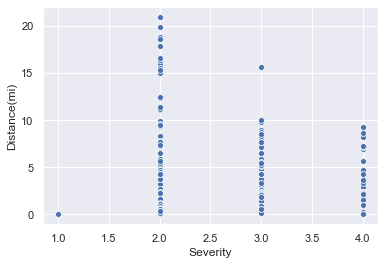

In [53]:
sns.scatterplot(x='Severity', y='Distance(mi)', data=sf_clear_accidents)

#### Null Hypothesis (H0): There is no difference in average accident severity during raining/drizzle weather or fair/clear weather based accidents within the San Francisco Bay Area
#### Alternative Hypothesis (H1): There is a difference in average accident severity during raining/drizzle weather or fair/clear weather based accidents within the San Francisco Bay Area

In [54]:
# Conduct 2 sample t test for both groups of severity data
stats.ttest_ind(sf_rain_accidents['Severity'], sf_clear_accidents['Severity'], equal_var = False)

Ttest_indResult(statistic=7.107943249297443, pvalue=1.2469866449466593e-12)

* p value < .05: Reject the Null. Accept the alternative.

#### Null Hypothesis (H0): There is no difference in average traffic distance buildup between raining/drizzle weather or fair/clear weather based accidents within the San Francisco Bay Area 

#### Alternative Hypothesis (H1): There is a difference in average traffic distance buildup between raining/drizzle weather or fair/clear weather based accidents within the San Francisco Bay Area 


In [55]:
# Conduct 2 sample t test for both groups of traffic distance data
stats.ttest_ind(sf_rain_accidents['Distance(mi)'], sf_clear_accidents['Distance(mi)'], equal_var = False)

Ttest_indResult(statistic=-0.799835855238579, pvalue=0.42382119506874805)

* p value > .05: Fail to reject the Null

#### Is there a correlation between severity and the distance of traffic backed up that accrues during clear weather conditions?

In [56]:
stats.pearsonr(sf_clear_accidents['Severity'], sf_clear_accidents['Distance(mi)'])

(0.001455008564760555, 0.7297199485203251)

* There seems to be a positive correlation

#### Is there a correlation between severity and the distance of traffic backed up that accrues during rainy weather conditions?

In [57]:
stats.pearsonr(sf_rain_accidents['Severity'], sf_rain_accidents['Distance(mi)'])

(-0.03245311031755575, 0.002372084546975913)

* There is no correlation

Text(0.5, 0, 'Not Raining Vs. Raining')

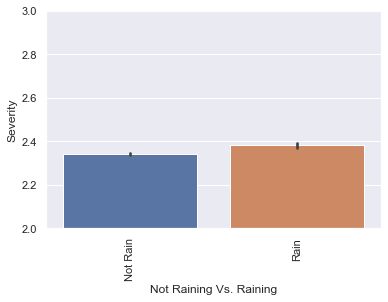

In [58]:
# Bar graph of the avg level of severity in car accidents caused by fair/clear weather vs. rain/drizzle weather (SF Bay Area)

ax = sns.barplot(y="Severity", x='Rain_NotRain_Filter', data=sf_boxplot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(2,3)
ax.set_xlabel("Not Raining Vs. Raining")

Text(0.5, 0, 'Not Raining Vs. Raining')

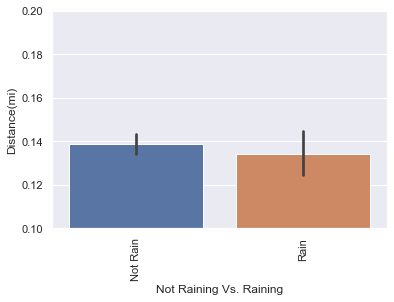

In [59]:
# Bar graph of the avg level of severity in car accidents caused by fair/clear weather vs. rain/drizzle weather (SF Bay Area)

ax = sns.barplot(y="Distance(mi)", x='Rain_NotRain_Filter', data=sf_boxplot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0.1,0.2)
ax.set_xlabel("Not Raining Vs. Raining")

* The average level of severity of car accidents is slightly higher when they occur in the rain
* The average level of traffic distance built up is slightly higher when it is not raining

### LA/OC Area 

In [60]:
# Table consisiting of weather conditions to categorize later
la_boxplot = (la_oc_cities['Weather_Condition']).str.contains('Rain|Drizzle|Thunderstorms|Fair|Clear', regex=True)
la_boxplot1 = la_oc_cities.iloc[la_boxplot.values]
la_boxplot1.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
42864,A-42865,3,2016-06-21 10:44:51,2016-06-21 11:24:00,0.0,I-5 N,Sylmar,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:44:51,10,2016-06-21,11:24:00,00:39:09
42865,A-42866,2,2016-06-21 10:44:12,2016-06-21 11:22:00,0.0,CA-170 S,North Hollywood,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:44:12,10,2016-06-21,11:22:00,00:37:48
42866,A-42867,2,2016-06-21 10:46:30,2016-06-21 11:27:00,0.0,US-101 N,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:46:30,10,2016-06-21,11:27:00,00:40:30
42867,A-42868,3,2016-06-21 10:49:21,2016-06-21 11:34:21,0.0,Golden State Fwy S,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:49:21,10,2016-06-21,11:34:21,00:45:00
42869,A-42870,2,2016-06-21 10:43:39,2016-06-21 11:28:39,0.0,Pomona Fwy W,South El Monte,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:43:39,10,2016-06-21,11:28:39,00:45:00


In [61]:
# String match "Fair, Clear, Fair / Windy, Rain, Light Rain, Heavy Rain, etc" into 2 buckets
la_boxplot1['Rain_NotRain_Filter'] = np.where(la_boxplot1['Weather_Condition'].str.contains('Fair|Clear'), 'Not Rain', 'Rain')
la_boxplot1.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Rain_NotRain_Filter
42864,A-42865,3,2016-06-21 10:44:51,2016-06-21 11:24:00,0.0,I-5 N,Sylmar,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:44:51,10,2016-06-21,11:24:00,00:39:09,Not Rain
42865,A-42866,2,2016-06-21 10:44:12,2016-06-21 11:22:00,0.0,CA-170 S,North Hollywood,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:44:12,10,2016-06-21,11:22:00,00:37:48,Not Rain
42866,A-42867,2,2016-06-21 10:46:30,2016-06-21 11:27:00,0.0,US-101 N,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:46:30,10,2016-06-21,11:27:00,00:40:30,Not Rain
42867,A-42868,3,2016-06-21 10:49:21,2016-06-21 11:34:21,0.0,Golden State Fwy S,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:49:21,10,2016-06-21,11:34:21,00:45:00,Not Rain
42869,A-42870,2,2016-06-21 10:43:39,2016-06-21 11:28:39,0.0,Pomona Fwy W,South El Monte,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:43:39,10,2016-06-21,11:28:39,00:45:00,Not Rain


In [62]:
# Filter rain/drizzle weather
la_rain_filter = (la_oc_cities['Weather_Condition']).str.contains('Rain|Drizzle', regex=True)
la_rain_accidents = la_oc_cities.iloc[la_rain_filter.values]
la_rain_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
55533,A-55534,3,2016-12-11 06:28:04,2016-12-11 06:56:48,0.01,I-15 N,Ontario,CA,US,US/Pacific,...,Night,Day,Day,Day,2016-12-11,06:28:04,6,2016-12-11,06:56:48,00:28:44
56580,A-56581,3,2016-12-15 15:41:14,2016-12-15 16:25:51,0.01,Foothill Fwy E,Baldwin Park,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-12-15,15:41:14,15,2016-12-15,16:25:51,00:44:37
56586,A-56587,2,2016-12-15 16:22:48,2016-12-15 17:07:32,0.01,Artesia Fwy E,Long Beach,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-12-15,16:22:48,16,2016-12-15,17:07:32,00:44:44
56589,A-56590,2,2016-12-15 16:47:14,2016-12-15 17:32:02,0.00,E Garvey Ave N,West Covina,CA,US,US/Pacific,...,Night,Day,Day,Day,2016-12-15,16:47:14,16,2016-12-15,17:32:02,00:44:48
56590,A-56591,2,2016-12-15 16:53:53,2016-12-15 17:38:43,0.01,S Westmoreland Ave,Los Angeles,CA,US,US/Pacific,...,Night,Day,Day,Day,2016-12-15,16:53:53,16,2016-12-15,17:38:43,00:44:50


In [63]:
# Descriptive stats of data for LA/OC accidents occuring in rainy weather
la_rain_accidents.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,9082.000000,9082.000000,9082.000000,9082.000000,9082.000000,9082
mean,2.383065,0.121817,55.793746,4.986110,10.462013,0 days 01:33:12.159546
std,0.503737,0.370341,4.964989,3.052628,6.274819,0 days 01:59:14.317363
min,1.000000,0.000000,12.900000,0.200000,0.000000,0 days 00:11:11
25%,2.000000,0.000000,53.000000,2.500000,5.000000,0 days 00:29:44
50%,2.000000,0.000000,55.400000,4.000000,10.000000,0 days 00:44:28
75%,3.000000,0.010000,59.000000,8.000000,15.000000,0 days 01:04:26
max,4.000000,17.040001,105.100000,10.000000,23.000000,0 days 20:41:26


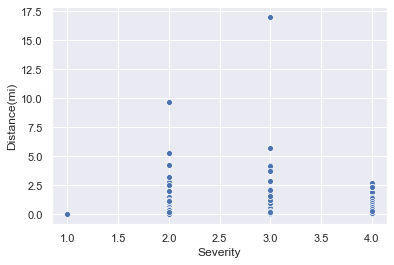

In [64]:
sns.scatterplot(x='Severity', y='Distance(mi)', data=la_rain_accidents)

In [65]:
# Filter fair/clear weather
la_clear_filter = (la_oc_cities['Weather_Condition']).isin(['Fair', 'Clear'])
la_clear_accidents = la_oc_cities.iloc[la_clear_filter.values]
la_clear_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
42864,A-42865,3,2016-06-21 10:44:51,2016-06-21 11:24:00,0.0,I-5 N,Sylmar,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:44:51,10,2016-06-21,11:24:00,00:39:09
42865,A-42866,2,2016-06-21 10:44:12,2016-06-21 11:22:00,0.0,CA-170 S,North Hollywood,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:44:12,10,2016-06-21,11:22:00,00:37:48
42866,A-42867,2,2016-06-21 10:46:30,2016-06-21 11:27:00,0.0,US-101 N,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:46:30,10,2016-06-21,11:27:00,00:40:30
42867,A-42868,3,2016-06-21 10:49:21,2016-06-21 11:34:21,0.0,Golden State Fwy S,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:49:21,10,2016-06-21,11:34:21,00:45:00
42869,A-42870,2,2016-06-21 10:43:39,2016-06-21 11:28:39,0.0,Pomona Fwy W,South El Monte,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:43:39,10,2016-06-21,11:28:39,00:45:00


In [66]:
# Descriptive stats of data for LA/OC accidents occuring in clear weather
la_clear_accidents.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,149743.000000,149743.000000,149743.000000,149743.000000,149743.000000,149743
mean,2.392579,0.118471,70.372174,9.765463,13.093300,0 days 01:39:01.054987
std,0.508019,0.550173,11.349591,0.845959,5.612825,1 days 03:48:13.885052
min,1.000000,0.000000,-29.900000,0.200000,0.000000,-1 days +23:29:36
25%,2.000000,0.000000,63.000000,10.000000,9.000000,0 days 00:29:48
50%,2.000000,0.000000,70.000000,10.000000,14.000000,0 days 00:44:39
75%,3.000000,0.010000,78.000000,10.000000,17.000000,0 days 01:12:40
max,4.000000,137.618000,114.800000,25.000000,23.000000,438 days 09:56:44


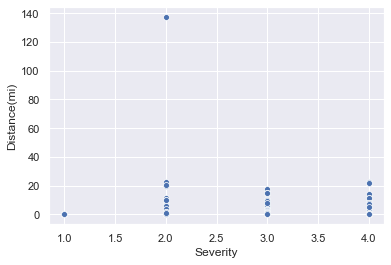

In [67]:
sns.scatterplot(x='Severity', y='Distance(mi)', data=la_clear_accidents)

#### Null Hypothesis (H0): There is no difference in average accident severity during raining/drizzle weather or fair/clear weather based accidents within the LA/OC Area 
#### Alternative Hypothesis (H1): There is a difference in average accident severity during raining/drizzle weather or fair/clear weather based accidents within the LA/OC Area 

In [68]:
# Run a 2 sample t test on the data
stats.ttest_ind(la_rain_accidents['Severity'], la_clear_accidents['Severity'], equal_var = False)

Ttest_indResult(statistic=-1.7468127299375205, pvalue=0.08069982682204614)

* p value > .05: Fail to reject the Null

#### Null Hypothesis (H0): There is no difference in average traffic distance buildup between raining/drizzle weather or fair/clear weather based accidents within the LA/OC Area 

#### Alternative Hypothesis (H1): There is a difference in average traffic distance buildup between raining/drizzle weather or fair/clear weather based accidents within the LA/OC Area 

In [69]:
stats.ttest_ind(la_rain_accidents['Distance(mi)'], la_clear_accidents['Distance(mi)'], equal_var = False)

Ttest_indResult(statistic=0.8086145781039992, pvalue=0.41875337176943095)

* p value > .05: Fail to reject the Null

#### Is there a correlation between severity and the distance of traffic backed up that accrues during rainy weather conditions?

In [70]:
stats.pearsonr(la_rain_accidents['Severity'], la_rain_accidents['Distance(mi)'])

(-0.012056417291816668, 0.2506159914677119)

* There isn't much of a correlation

#### Is there a correlation between severity and the distance of traffic backed up that accrues during clear weather conditions?

In [71]:
stats.pearsonr(la_clear_accidents['Severity'], la_clear_accidents['Distance(mi)'])

(-0.003173973596116944, 0.21936664520051177)

* There isn't much of a correlation

Text(0.5, 0, 'Not Raining Vs. Raining')

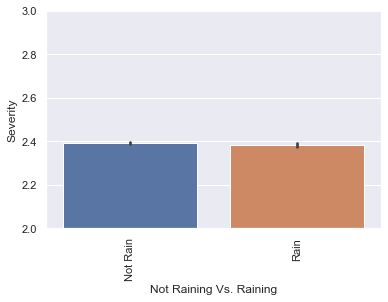

In [72]:
# Bar graph of the avg level of severity in car accidents caused by fair/clear weather vs. rain/drizzle weather (LA/OC Area)

ax = sns.barplot(y="Severity", x='Rain_NotRain_Filter', data=la_boxplot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(2,3)
ax.set_xlabel("Not Raining Vs. Raining")

Text(0.5, 0, 'Not Raining Vs. Raining')

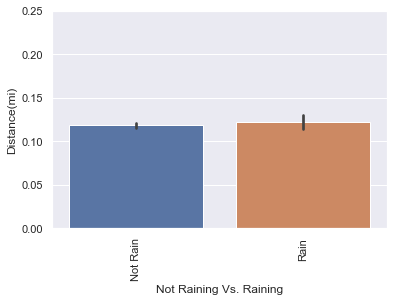

In [73]:
# Bar graph of the avg distance of traffic caused by car accidents caused by fair/clear weather vs. rain/drizzle weather (LA/OC Area)

ax = sns.barplot(y="Distance(mi)", x='Rain_NotRain_Filter', data=la_boxplot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,0.25)
ax.set_xlabel("Not Raining Vs. Raining")

* The average level of severity of car accidents is almost the same between rain and non rain like conditions
* The average level of traffic distance built up is almost the same between rain and non rain like conditions
* Could be due to LA not getting much rain

### SF Bay Area vs LA/OC Area 

#### Null Hypothesis (H0): There is no difference in average accident severity between San Francisco Bay Area and Los Angeles area
#### Alternative Hypothesis (H1): There is a difference in average accident severity  between San Francisco Bay Area and Los Angeles area

In [74]:
# Run a 2 sample t test on the data
stats.ttest_ind(bay_area_cities['Severity'], la_oc_cities['Severity'], equal_var = False)

Ttest_indResult(statistic=-35.30209404135831, pvalue=2.1731166535675863e-272)

* p < alpha : Reject the null. Accept the alternative.

#### Null Hypothesis (H0): There is no difference in average traffic distance between San Francisco Bay Area and Los Angeles area
#### Alternative Hypothesis (H1): There is a difference in average traffic distance between San Francisco Bay Area and Los Angeles area

In [75]:
# Run a 2 sample t test on the data
stats.ttest_ind(bay_area_cities['Distance(mi)'], la_oc_cities['Distance(mi)'], equal_var = False)

Ttest_indResult(statistic=10.755900561493553, pvalue=5.636041431834455e-27)

* p < alpha : Reject the null. Accept the alternative.

In [76]:
# Creating bucket to categorize all SF Bay Area cities into a single bucket
bay_area_bucket = (df_accidents['State'] == 'CA') & (df_accidents['City'].isin([
'Alameda',
'Albany',
'American Canyon',
'Antioch',
'Altherton',
'Belmont',
'Belvedere',
'Benicia',
'Berkeley',
'Brentwood',
'Brisbane',
'Burlingame',
'Calistoga',
'Campbell',
'Clayton',
'Cloverdale',
'Colma',    
'Concord',
'Cotati',
'Corte Madera',
'Cupertino',
'Daly City',
'Danville',
'Dixon',
'Dublin',
'East Palo Alto',
'El Cerrito',
'Emeryville',
'Fairfield',
'Foster City',
'Fremont',
'Gilroy',
'Half Moon Bay',
'Hayward',
'Healdsburg',
'Hercules',
'Hillsborough',
'Lafayette',
'Larkspur',
'Livermore',
'Los Altos',
'Los Altos Hills',
'Los Gatos',
'Martinez',
'Menlo Park',
'Mill Valley',
'Millbrae',
'Milpitas',
'Monte Sereno',
'Morgan Hill',
'Moraga',
'Mountain View',
'Napa',
'Newark',
'Novato',
'Oakland',
'Oakley',
'Orinda',
'Pacifica',
'Palo Alto',
'Petaluma',
'Pinole',
'Pittsburg',
'Pleasant Hill',
'Pleasanton',
'Portola Valley',
'Redwood City',
'Richmond',
'Rio Vista',
'Ross',
'Rohnert Park',
'San Anselmo',
'St. Helena',
'San Bruno',
'San Carlos',
'San Francisco',
'San Jose',
'San Leandro',
'San Mateo',
'San Pablo',
'San Rafael',
'San Ramon',
'Santa Clara',
'Santa Rosa',
'Saratoga',
'Sausalito',
'Sebastopol',
'Sonoma',
'South San Francisco',
'Suisun City',
'Sunnyvale',
'Tiburon',
'Union City',
'Vacaville',
'Vallejo'
'Walnut Creek',
'Windsor',
'Woodside',
'Yountville']))
bay_area_cities_bucket = df_accidents.iloc[bay_area_bucket.values]
bay_area_cities_bucket.head()


,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
729,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,0.0,I-880 N,Hayward,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:30:16,10,2016-06-21,11:16:39,00:46:23
731,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,0.0,N De Anza Blvd,Cupertino,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:41:42,10,2016-06-21,11:11:42,00:30:00
732,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,0.0,Norman Y Mineta Hwy,San Jose,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:16:26,10,2016-06-21,11:04:16,00:47:50
733,A-734,3,2016-06-21 10:31:06,2016-06-21 11:16:26,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:31:06,10,2016-06-21,11:16:26,00:45:20
734,A-735,3,2016-06-21 10:17:17,2016-06-21 11:03:50,0.0,I-280 S,San Jose,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:17:17,10,2016-06-21,11:03:50,00:46:33


In [77]:
# Creating bucket to categorize all SF Bay Area cities into a single bucket
bay_area_cities_bucket['Bucket'] = 'Bay Area'
bay_area_cities_bucket.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Bucket
729,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,0.0,I-880 N,Hayward,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:30:16,10,2016-06-21,11:16:39,00:46:23,Bay Area
731,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,0.0,N De Anza Blvd,Cupertino,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:41:42,10,2016-06-21,11:11:42,00:30:00,Bay Area
732,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,0.0,Norman Y Mineta Hwy,San Jose,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:16:26,10,2016-06-21,11:04:16,00:47:50,Bay Area
733,A-734,3,2016-06-21 10:31:06,2016-06-21 11:16:26,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:31:06,10,2016-06-21,11:16:26,00:45:20,Bay Area
734,A-735,3,2016-06-21 10:17:17,2016-06-21 11:03:50,0.0,I-280 S,San Jose,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:17:17,10,2016-06-21,11:03:50,00:46:33,Bay Area


In [78]:
# Creating bucket to categorize all LA/OC Area cities into a single bucket
la_oc_bucket = (df_accidents['State'] == 'CA') & (df_accidents['City'].isin([
'Acton',
'Altadena',
'Agoura Hills', 
'Alhambra',   
'Arcadia', 
'Artesia',
'Avalon', 
'Azusa', 
'Baldwin Park', 
'Bell Gardens', 
'Bell',
'Bellflower', 
'Beverly Hills', 
'Bradbury', 
'Burbank', 
'Calabasas',
'Canoga Park',
'Canyon Country',
'Carson', 
'Castaic',
'Cerritos', 
'Chatsworth',
'Chino',
'Claremont', 
'Commerce', 
'Compton', 
'Covina', 
'Cudahy', 
'Culver City', 
'Diamond Bar', 
'Downey', 
'Duarte', 
'El Monte', 
'El Segundo', 
'Gardena',
'Glendale',
'Glendora', 
'Hawaiian Gardens', 
'Hawthorne', 
'Harbor City',
'Hermosa Beach', 
'Hidden Hills',
'Huntington Beach', 
'Industry', 
'Inglewood', 
'Irwindale', 
'La Canada Flintridge', 
'La Crescenta',
'La Habra Heights', 
'La Mirada', 
'La Puente', 
'La Verne', 
'Lakewood', 
'Lake Hughes',
'Lancaster', 
'Lawndale', 
'Lomita',
'Long Beach',
'Los Angeles',
'Lynwood',
'Malibu',
'Manhattan Beach',
'Maywood',
'Monrovia',
'Montebello',
'Monterey Park',
'Montrose',
'Mount Wilson',
'Norwalk',
'Newhall',
'Northridge',
'North Hills',
'North Hollywood',
'Ontario',
'Pacoima',
'Pacific Palisades',
'Palmdale',
'Palos Verdes Peninsula',
'Palos Verdes Estates',
'Panorama City',
'Paramount',
'Pasadena',
'Pearblossom',
'Pico Rivera',
'Playa Del Rey',
'Playa Vista',
'Pomona',
'Porter Ranch',
'Rancho Palos Verdes',
'Redondo Beach',
'Reseda',
'Rolling Hills Estates',
'Rolling Hills',
'Rosemead',
'San Dimas',
'San Fernando',
'San Gabriel',
'San Marino',
'San Pedro',
'Santa Clarita',
'Santa Fe Springs',
'Santa Monica',
'Sherman Oaks',
'Sierra Madre',
'Signal Hills',
'South El Monte',
'South Gate',
'South Pasadena',
'Stevenson Ranch',
'Studio City',
'Sun Valley',
'Sunland',
'Sylmar',
'Tarzana',
'Temple City',
'Topanga',
'Torrance',
'Tujunga',
'Valencia',
'Valley Village',
'Valyermo',
'Van Nuys',
'Venice',
'Vernon',
'Verdugo City',
'Walnut', 
'West Covina', 
'West Hills',
'West Hollywood', 
'Westlake Village', 
'Whittier',
'Woodland Hills',
'Wilmington',
'Winnetka',
'Aliso Viejo',
'Anaheim',
'Brea',
'Buena Park',
'Costa Mesa',
'Cypress',
'Dana Point',
'Fountain Valley',
'Fullerton',
'Garden Grove',
'Huntington Beach',
'Irvine',
'La Habra',
'La Palma',
'Laguna Beach',
'Laguna Hills',
'Laguna Niguel',
'Laguna Woods',
'Lake Forest',
'Los Alamitos',
'Mission Viejo',
'Newport Beach',
'Orange',
'Placentia',
'Rancho Santa Margarita',
'San Clemente',
'San Juan Capistrano',
'Santa Ana',
'Seal Beach',
'Stanton',
'Tustin',
'Villa Park',
'Westminster',
'Yorba Linda']))
la_oc_cities_bucket = df_accidents.iloc[la_oc_bucket.values]
la_oc_cities_bucket.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
42864,A-42865,3,2016-06-21 10:44:51,2016-06-21 11:24:00,0.0,I-5 N,Sylmar,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:44:51,10,2016-06-21,11:24:00,00:39:09
42865,A-42866,2,2016-06-21 10:44:12,2016-06-21 11:22:00,0.0,CA-170 S,North Hollywood,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:44:12,10,2016-06-21,11:22:00,00:37:48
42866,A-42867,2,2016-06-21 10:46:30,2016-06-21 11:27:00,0.0,US-101 N,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:46:30,10,2016-06-21,11:27:00,00:40:30
42867,A-42868,3,2016-06-21 10:49:21,2016-06-21 11:34:21,0.0,Golden State Fwy S,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:49:21,10,2016-06-21,11:34:21,00:45:00
42869,A-42870,2,2016-06-21 10:43:39,2016-06-21 11:28:39,0.0,Pomona Fwy W,South El Monte,CA,US,US/Pacific,...,Day,Day,Day,Day,2016-06-21,10:43:39,10,2016-06-21,11:28:39,00:45:00


In [79]:
# Creating bucket to categorize all LA/OC Area cities into a single bucket
la_oc_cities_bucket['Bucket'] = "LA/OC Area" 
la_oc_cities_bucket.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Bucket
42864,A-42865,3,2016-06-21 10:44:51,2016-06-21 11:24:00,0.0,I-5 N,Sylmar,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:44:51,10,2016-06-21,11:24:00,00:39:09,LA/OC Area
42865,A-42866,2,2016-06-21 10:44:12,2016-06-21 11:22:00,0.0,CA-170 S,North Hollywood,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:44:12,10,2016-06-21,11:22:00,00:37:48,LA/OC Area
42866,A-42867,2,2016-06-21 10:46:30,2016-06-21 11:27:00,0.0,US-101 N,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:46:30,10,2016-06-21,11:27:00,00:40:30,LA/OC Area
42867,A-42868,3,2016-06-21 10:49:21,2016-06-21 11:34:21,0.0,Golden State Fwy S,Los Angeles,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:49:21,10,2016-06-21,11:34:21,00:45:00,LA/OC Area
42869,A-42870,2,2016-06-21 10:43:39,2016-06-21 11:28:39,0.0,Pomona Fwy W,South El Monte,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:43:39,10,2016-06-21,11:28:39,00:45:00,LA/OC Area


In [80]:
# Combine both Bay Area and lA/OC area data frames
bay_la_oc = pd.concat([bay_area_cities_bucket, la_oc_cities_bucket])
bay_la_oc.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Bucket
729,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,0.0,I-880 N,Hayward,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:30:16,10,2016-06-21,11:16:39,00:46:23,Bay Area
731,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,0.0,N De Anza Blvd,Cupertino,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:41:42,10,2016-06-21,11:11:42,00:30:00,Bay Area
732,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,0.0,Norman Y Mineta Hwy,San Jose,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:16:26,10,2016-06-21,11:04:16,00:47:50,Bay Area
733,A-734,3,2016-06-21 10:31:06,2016-06-21 11:16:26,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:31:06,10,2016-06-21,11:16:26,00:45:20,Bay Area
734,A-735,3,2016-06-21 10:17:17,2016-06-21 11:03:50,0.0,I-280 S,San Jose,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:17:17,10,2016-06-21,11:03:50,00:46:33,Bay Area


Text(0.5, 0, 'SF Bay Area(0) vs. LA Area(1)')

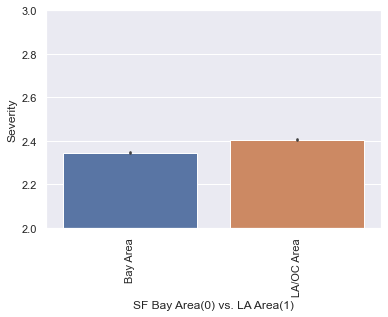

In [81]:
# Bar graph of the avg level of severity in car accidents between SF bay Area and LA/OC Area

ax = sns.barplot(y="Severity", x='Bucket', data=bay_la_oc)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(2,3)
ax.set_xlabel("SF Bay Area(0) vs. LA Area(1)")

Text(0.5, 0, 'SF Bay Area(0) vs. LA Area(1)')

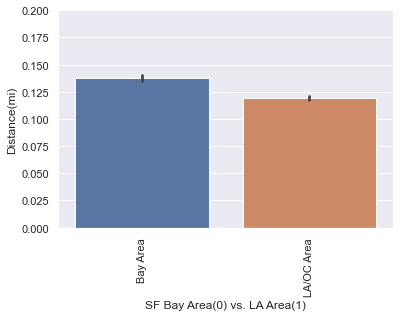

In [82]:
# Bar graph of the avg traffic distance caused by car accidents between SF bay Area and LA/OC Area

ax = sns.barplot(y="Distance(mi)", x='Bucket', data=bay_la_oc)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,0.2)
ax.set_xlabel("SF Bay Area(0) vs. LA Area(1)")

* Average accident severity levels are slightly higher in LA/OC
* Traffic distance built up is higher in the Bay Area

### Daylights Savings Time Analysis (SF Bay Area) 

In [83]:
dst_bay_area_cities = bay_area_cities_bucket
dst_bay_area_cities.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Bucket
729,A-730,3,2016-06-21 10:30:16,2016-06-21 11:16:39,0.0,I-880 N,Hayward,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:30:16,10,2016-06-21,11:16:39,00:46:23,Bay Area
731,A-732,3,2016-06-21 10:41:42,2016-06-21 11:11:42,0.0,N De Anza Blvd,Cupertino,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:41:42,10,2016-06-21,11:11:42,00:30:00,Bay Area
732,A-733,2,2016-06-21 10:16:26,2016-06-21 11:04:16,0.0,Norman Y Mineta Hwy,San Jose,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:16:26,10,2016-06-21,11:04:16,00:47:50,Bay Area
733,A-734,3,2016-06-21 10:31:06,2016-06-21 11:16:26,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:31:06,10,2016-06-21,11:16:26,00:45:20,Bay Area
734,A-735,3,2016-06-21 10:17:17,2016-06-21 11:03:50,0.0,I-280 S,San Jose,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,10:17:17,10,2016-06-21,11:03:50,00:46:33,Bay Area


In [84]:
# Filter data to accidents occuring from 5-7 pm

dst_filter = (dst_bay_area_cities['Military_time_bin_filter'] >= 17) & (dst_bay_area_cities['Military_time_bin_filter'] <= 19) 
daylight_savings_bay = dst_bay_area_cities.iloc[dst_filter.values]
daylight_savings_bay.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Bucket
804,A-805,3,2016-06-21 19:38:23,2016-06-21 20:08:23,0.0,I-880 N,San Leandro,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,19:38:23,19,2016-06-21,20:08:23,00:30:00,Bay Area
805,A-806,3,2016-06-21 19:34:13,2016-06-21 20:04:13,0.0,I-680 N,Danville,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,19:34:13,19,2016-06-21,20:04:13,00:30:00,Bay Area
806,A-807,2,2016-06-21 19:45:28,2016-06-21 20:15:28,0.0,CA-17 S,Los Gatos,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,19:45:28,19,2016-06-21,20:15:28,00:30:00,Bay Area
807,A-808,3,2016-06-21 19:46:41,2016-06-21 20:16:41,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,19:46:41,19,2016-06-21,20:16:41,00:30:00,Bay Area
926,A-927,2,2016-06-22 17:44:46,2016-06-22 18:29:46,0.0,Fremont Blvd,Fremont,CA,US,US/Pacific,...,Day,Day,Day,2016-06-22,17:44:46,17,2016-06-22,18:29:46,00:45:00,Bay Area


In [85]:
# Convert Start_Time to datetime64
daylight_savings_bay['Date_Start'] = pd.to_datetime(daylight_savings_bay['Date_Start'], dayfirst=True)

In [86]:
daylight_savings_bay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22757 entries, 804 to 2973865
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   ID                        22757 non-null  object         
 1   Severity                  22757 non-null  int64          
 2   Start_Time                22757 non-null  datetime64[ns] 
 3   End_Time                  22757 non-null  datetime64[ns] 
 4   Distance(mi)              22757 non-null  float64        
 5   Street                    22757 non-null  object         
 6   City                      22757 non-null  object         
 7   State                     22757 non-null  object         
 8   Country                   22757 non-null  object         
 9   Timezone                  22757 non-null  object         
 10  Temperature(F)            22757 non-null  float64        
 11  Visibility(mi)            22757 non-null  float64        
 12  

In [87]:
# Filter to day lights savings time from 2016-2019 with their respective day light savings time dates

dst_month = (daylight_savings_bay['Date_Start'] > '2016-03-12') & (daylight_savings_bay['Date_Start'] < '2016-11-07') | (daylight_savings_bay['Date_Start'] > '2017-03-11') & (daylight_savings_bay['Date_Start'] < '2017-11-06') | (daylight_savings_bay['Date_Start'] > '2018-03-10') & (daylight_savings_bay['Date_Start'] < '2018-11-05') | (daylight_savings_bay['Date_Start'] > '2019-03-09') & (daylight_savings_bay['Date_Start'] < '2019-11-04')
dst_month_filter = daylight_savings_bay.iloc[dst_month.values]
dst_month_filter['DST'] = 0
dst_month_filter.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Bucket,DST
804,A-805,3,2016-06-21 19:38:23,2016-06-21 20:08:23,0.0,I-880 N,San Leandro,CA,US,US/Pacific,...,Day,Day,2016-06-21,19:38:23,19,2016-06-21,20:08:23,00:30:00,Bay Area,0
805,A-806,3,2016-06-21 19:34:13,2016-06-21 20:04:13,0.0,I-680 N,Danville,CA,US,US/Pacific,...,Day,Day,2016-06-21,19:34:13,19,2016-06-21,20:04:13,00:30:00,Bay Area,0
806,A-807,2,2016-06-21 19:45:28,2016-06-21 20:15:28,0.0,CA-17 S,Los Gatos,CA,US,US/Pacific,...,Day,Day,2016-06-21,19:45:28,19,2016-06-21,20:15:28,00:30:00,Bay Area,0
807,A-808,3,2016-06-21 19:46:41,2016-06-21 20:16:41,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,2016-06-21,19:46:41,19,2016-06-21,20:16:41,00:30:00,Bay Area,0
926,A-927,2,2016-06-22 17:44:46,2016-06-22 18:29:46,0.0,Fremont Blvd,Fremont,CA,US,US/Pacific,...,Day,Day,2016-06-22,17:44:46,17,2016-06-22,18:29:46,00:45:00,Bay Area,0


In [88]:
# Filter for all other times of the day during non dst 
not_dst_filter = (dst_bay_area_cities['Military_time_bin_filter'] >= 17) & (dst_bay_area_cities['Military_time_bin_filter'] <= 19) 
not_daylight_savings_bay = dst_bay_area_cities.iloc[not_dst_filter.values]
not_daylight_savings_bay.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Bucket
804,A-805,3,2016-06-21 19:38:23,2016-06-21 20:08:23,0.0,I-880 N,San Leandro,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,19:38:23,19,2016-06-21,20:08:23,00:30:00,Bay Area
805,A-806,3,2016-06-21 19:34:13,2016-06-21 20:04:13,0.0,I-680 N,Danville,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,19:34:13,19,2016-06-21,20:04:13,00:30:00,Bay Area
806,A-807,2,2016-06-21 19:45:28,2016-06-21 20:15:28,0.0,CA-17 S,Los Gatos,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,19:45:28,19,2016-06-21,20:15:28,00:30:00,Bay Area
807,A-808,3,2016-06-21 19:46:41,2016-06-21 20:16:41,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,Day,2016-06-21,19:46:41,19,2016-06-21,20:16:41,00:30:00,Bay Area
926,A-927,2,2016-06-22 17:44:46,2016-06-22 18:29:46,0.0,Fremont Blvd,Fremont,CA,US,US/Pacific,...,Day,Day,Day,2016-06-22,17:44:46,17,2016-06-22,18:29:46,00:45:00,Bay Area


In [89]:
# Convert Start_Time to datetime64
not_daylight_savings_bay['Date_Start'] = pd.to_datetime(not_daylight_savings_bay['Date_Start'], dayfirst=True)

In [90]:
not_daylight_savings_bay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22757 entries, 804 to 2973865
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   ID                        22757 non-null  object         
 1   Severity                  22757 non-null  int64          
 2   Start_Time                22757 non-null  datetime64[ns] 
 3   End_Time                  22757 non-null  datetime64[ns] 
 4   Distance(mi)              22757 non-null  float64        
 5   Street                    22757 non-null  object         
 6   City                      22757 non-null  object         
 7   State                     22757 non-null  object         
 8   Country                   22757 non-null  object         
 9   Timezone                  22757 non-null  object         
 10  Temperature(F)            22757 non-null  float64        
 11  Visibility(mi)            22757 non-null  float64        
 12  

In [91]:
# Filter to non day lights savings time from 2016-2019 with their respective day light savings time dates
# Error

not_dst_month = (not_daylight_savings_bay['Date_Start'] >= '2016-01-01') & (not_daylight_savings_bay['Date_Start'] < '2016-03-13') | (not_daylight_savings_bay['Date_Start'] >= '2016-11-6') & (not_daylight_savings_bay['Date_Start'] < '2017-03-12') | (not_daylight_savings_bay['Date_Start'] >= '2017-11-05') & (not_daylight_savings_bay['Date_Start'] < '2018-03-11') | (not_daylight_savings_bay['Date_Start'] >= '2018-11-04') & (not_daylight_savings_bay['Date_Start'] < '2019-03-10') | (not_daylight_savings_bay['Date_Start'] >= '2019-11-03')
not_dst_month_filter = not_daylight_savings_bay.iloc[not_dst_month.values]
not_dst_month_filter['DST'] = 1
not_dst_month_filter.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Bucket,DST
5043,A-5044,2,2016-11-30 17:04:07,2016-11-30 17:32:42,0.01,CA-4 W,Concord,CA,US,US/Pacific,...,Day,Day,2016-11-30,17:04:07,17,2016-11-30,17:32:42,00:28:35,Bay Area,1
5045,A-5046,2,2016-11-30 17:14:18,2016-11-30 17:44:01,0.01,US-101 N,Santa Rosa,CA,US,US/Pacific,...,Day,Day,2016-11-30,17:14:18,17,2016-11-30,17:44:01,00:29:43,Bay Area,1
5046,A-5047,2,2016-11-30 17:13:45,2016-11-30 17:43:25,0.00,Eagle Rock Rd,Mill Valley,CA,US,US/Pacific,...,Day,Day,2016-11-30,17:13:45,17,2016-11-30,17:43:25,00:29:40,Bay Area,1
5051,A-5052,3,2016-11-30 17:38:08,2016-11-30 18:07:49,0.01,James Lick Fwy N,San Francisco,CA,US,US/Pacific,...,Day,Day,2016-11-30,17:38:08,17,2016-11-30,18:07:49,00:29:41,Bay Area,1
5052,A-5053,3,2016-11-30 17:44:09,2016-11-30 18:13:46,0.01,I-580 W,Pleasanton,CA,US,US/Pacific,...,Day,Day,2016-11-30,17:44:09,17,2016-11-30,18:13:46,00:29:37,Bay Area,1


In [92]:
# Combine the 2 data frames
bay_dst_not_dst = pd.concat([dst_month_filter, not_dst_month_filter])
bay_dst_not_dst.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Bucket,DST
804,A-805,3,2016-06-21 19:38:23,2016-06-21 20:08:23,0.0,I-880 N,San Leandro,CA,US,US/Pacific,...,Day,Day,2016-06-21,19:38:23,19,2016-06-21,20:08:23,00:30:00,Bay Area,0
805,A-806,3,2016-06-21 19:34:13,2016-06-21 20:04:13,0.0,I-680 N,Danville,CA,US,US/Pacific,...,Day,Day,2016-06-21,19:34:13,19,2016-06-21,20:04:13,00:30:00,Bay Area,0
806,A-807,2,2016-06-21 19:45:28,2016-06-21 20:15:28,0.0,CA-17 S,Los Gatos,CA,US,US/Pacific,...,Day,Day,2016-06-21,19:45:28,19,2016-06-21,20:15:28,00:30:00,Bay Area,0
807,A-808,3,2016-06-21 19:46:41,2016-06-21 20:16:41,0.0,I-580 E,Pleasanton,CA,US,US/Pacific,...,Day,Day,2016-06-21,19:46:41,19,2016-06-21,20:16:41,00:30:00,Bay Area,0
926,A-927,2,2016-06-22 17:44:46,2016-06-22 18:29:46,0.0,Fremont Blvd,Fremont,CA,US,US/Pacific,...,Day,Day,2016-06-22,17:44:46,17,2016-06-22,18:29:46,00:45:00,Bay Area,0


#### Null Hypothesis (H0): There is no difference in average accident severity during the times of daylights savings (March - Nov) specifically between 5pm - 7pm when the sun is glaring in drivers eyes vs. 5pm - 7pm during non daylight savings times in San Francisco Bay Area

#### Alternative Hypothesis (H0): There is no difference in average accident severity during the times of daylights savings (March - Nov) specifically between 5pm - 7pm when the sun is glaring in drivers eyes vs. 5pm - 7pm during non daylight savings times in San Francisco Bay Area


In [93]:
# Run a two sampe t test on the 2 data groups
stats.ttest_ind(dst_month_filter['Severity'], not_dst_month_filter['Severity'], equal_var = False)

Ttest_indResult(statistic=1.027062620584019, pvalue=0.30440536805407764)

* p value > .05: Fail to reject the Null

#### Null Hypothesis (H0): There is no difference in average traffic distance build up during the times of daylights savings (March - Nov) specifically between 5pm - 7pm when the sun is glaring in drivers eyes vs. 5pm - 7pm during non daylight savings times in San Francisco Bay Area

#### Alternative Hypothesis (H0): There is no difference in average traffic distance build up during the times of daylights savings (March - Nov) specifically between 5pm - 7pm when the sun is glaring in drivers eyes vs. 5pm - 7pm during non daylight savings times in San Francisco Bay Area

In [94]:
stats.ttest_ind(dst_month_filter['Distance(mi)'], not_dst_month_filter['Distance(mi)'], equal_var = False)

Ttest_indResult(statistic=3.184895496683811, pvalue=0.0014502310976119614)

* p < alpha : Reject the null. Accept the alternative.

Text(0.5, 0, 'DST 5-7 PM (0) vs. Non DST 5-7PM (1)')

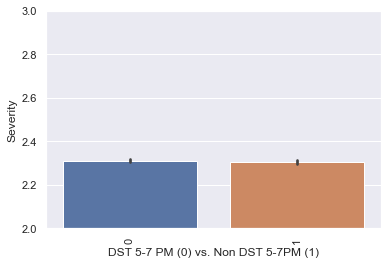

In [95]:
ax = sns.barplot(y="Severity", x='DST', data=bay_dst_not_dst)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(2,3)
ax.set_xlabel("DST 5-7 PM (0) vs. Non DST 5-7PM (1)")

Text(0.5, 0, 'DST 5-7 PM (0) vs. Non DST 5-7PM (1)')

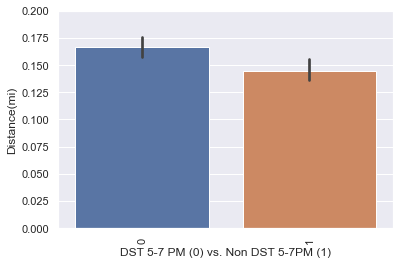

In [96]:
ax = sns.barplot(y="Distance(mi)", x='DST', data=bay_dst_not_dst)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0,0.2)
ax.set_xlabel("DST 5-7 PM (0) vs. Non DST 5-7PM (1)")

* Average severity levels are roughly the same whether its daylights savings time or not within the Bay Area
* Average traffic distance buildup is higher during day lights saving time within the bay Area

### All accross the U.S.

In [97]:
# Create new dataframe for analysis on all of US
df_usa_accidents = pd.read_csv("US_Accidents.csv")

In [98]:
# Drop rows not used
df_usa_accidents = df_usa_accidents.drop(['End_Lat', 'End_Lng', 'Number', 'Source', 'TMC', 'Side', 'Start_Lat', 'Start_Lng', 'Description', 'Zipcode', 'Country', 'Airport_Code', 'Wind_Chill(F)', 'Wind_Direction', 'Weather_Timestamp', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)'], axis=1)

In [99]:
df_usa_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,County,State,Timezone,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,Montgomery,OH,US/Eastern,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,Franklin,OH,US/Eastern,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,State Route 32,Williamsburg,Clermont,OH,US/Eastern,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,I-75 S,Dayton,Montgomery,OH,US/Eastern,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,OH,US/Eastern,...,False,False,False,False,True,False,Day,Day,Day,Day


In [100]:
df_usa_accidents.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     2974335 non-null  object 
 1   Severity               2974335 non-null  int64  
 2   Start_Time             2974335 non-null  object 
 3   End_Time               2974335 non-null  object 
 4   Distance(mi)           2974335 non-null  float64
 5   Street                 2974335 non-null  object 
 6   City                   2974252 non-null  object 
 7   County                 2974335 non-null  object 
 8   State                  2974335 non-null  object 
 9   Timezone               2971172 non-null  object 
 10  Temperature(F)         2918272 non-null  float64
 11  Visibility(mi)         2908644 non-null  float64
 12  Weather_Condition      2908403 non-null  object 
 13  Amenity                2974335 non-null  bool   
 14  Bump              

In [101]:
# Drop all NaN
df_usa_accidents = df_accidents.dropna(how='any')

In [102]:
# Info on data (USA)
df_usa_accidents.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,2.891830e+06,2.891830e+06,2.891830e+06,2.891830e+06,2.891830e+06,2891830
mean,2.358299e+00,2.824016e-01,6.238924e+01,9.149014e+00,1.211528e+01,0 days 01:57:31.584958
std,5.402403e-01,1.534803e+00,1.876849e+01,2.874234e+00,5.091449e+00,2 days 07:28:28.020970
min,1.000000e+00,0.000000e+00,-4.000000e+01,0.000000e+00,0.000000e+00,-1 days +23:25:55
25%,2.000000e+00,0.000000e+00,5.000000e+01,1.000000e+01,8.000000e+00,0 days 00:29:43
50%,2.000000e+00,0.000000e+00,6.440000e+01,1.000000e+01,1.200000e+01,0 days 00:44:35
75%,3.000000e+00,1.000000e-02,7.600000e+01,1.000000e+01,1.600000e+01,0 days 01:14:41
max,4.000000e+00,3.336300e+02,1.706000e+02,1.400000e+02,2.300000e+01,1061 days 02:53:22


In [103]:
df_usa_accidents['Weather_Condition'].value_counts().head(60)

Clear                           802759
Mostly Cloudy                   410924
Overcast                        379850
Fair                            333222
Partly Cloudy                   294290
Scattered Clouds                203662
Light Rain                      140421
Cloudy                          114875
Light Snow                       42060
Haze                             33983
Rain                             32561
Fog                              21937
Heavy Rain                       11969
Light Drizzle                    10231
Light Thunderstorms and Rain      4918
Snow                              4761
Thunderstorm                      4364
Fair / Windy                      3736
Smoke                             3571
Heavy Thunderstorms and Rain      2465
Patches of Fog                    2385
Thunderstorms and Rain            2202
Thunder in the Vicinity           2163
Mist                              2154
T-Storm                           2146
Light Freezing Rain      

In [104]:
# Total number of accidents per state
df_usa_accidents.groupby('State').count()['ID']

State
AL     35935
AR      1660
AZ     59462
CA    644208
CO     39401
CT     22631
DC      2834
DE      4390
FL    219164
GA     82019
IA      9931
ID      1665
IL     86000
IN     29463
KS      4279
KY     18985
LA     52176
MA     30306
MD     33400
ME      2017
MI     88339
MN     61603
MO     28241
MS      5788
MT       490
NC    141233
ND        41
NE     22312
NH      6938
NJ     47580
NM      4997
NV      9392
NY    135595
OH     55468
OK     50597
OR     69450
PA     88607
RI      9983
SC    142878
SD        59
TN     57800
TX    290133
UT     38163
VA     74855
VT       570
WA     60634
WI     17445
WV      2232
WY       481
Name: ID, dtype: int64

In [105]:
# Min, max, and mean car accident traffic severity accross US states
df_grouped_usa_accidents = df_usa_accidents.groupby('State').agg({'Severity': ['mean', 'min', 'max']})
df_grouped_usa_accidents.columns = ['Severity Avg', 'Severity Min', 'Severity Max']
df_grouped_usa_accidents = df_grouped_usa_accidents.reset_index()
df_grouped_usa_accidents.head(10) 

,State,Severity Avg,Severity Min,Severity Max
0,AL,2.354724,1,4
1,AR,2.769880,2,4
2,AZ,2.287881,1,4
3,CA,2.337462,1,4
4,CO,2.541281,1,4
5,CT,2.604436,1,4
6,DC,2.492237,1,4
7,DE,2.349431,1,4
8,FL,2.385323,1,4
9,GA,2.663432,1,4


In [106]:
# Top 5 states averaging highest severities
highest_avg_severity_states = df_grouped_usa_accidents.sort_values(by='Severity Avg', ascending=False)
highest_avg_severity_states.head(5)

,State,Severity Avg,Severity Min,Severity Max
39,SD,3.288136,2,4
48,WY,3.114345,2,4
1,AR,2.769880,2,4
26,ND,2.756098,2,4
24,MT,2.679592,2,4


In [107]:
# Top 5 states averaging lowest severities
lowest_avg_severity_states = df_grouped_usa_accidents.sort_values(by='Severity Avg', ascending=True)
lowest_avg_severity_states.head(5)

,State,Severity Avg,Severity Min,Severity Max
34,OK,2.105224,1,4
19,ME,2.124938,1,4
25,NC,2.161704,1,4
35,OR,2.164953,1,4
27,NE,2.170715,1,4


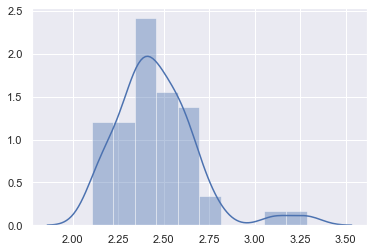

In [108]:
# Check distribution on the average levels of severity
df_grouped_usa_accidents = df_usa_accidents.groupby('State').agg({'Severity': ['mean']})
ax = sns.distplot(df_grouped_usa_accidents)

* Distribution seems fairly normal

In [109]:
# Min, max, and mean car accident traffic distances(miles) by SF Bay Area cities
df_grouped_usa_accidents2 = df_usa_accidents.groupby('State').agg({'Distance(mi)': ['mean', 'min', 'max']})
df_grouped_usa_accidents2.columns = ['Distance Avg', 'Distance Min', 'Distance Max']
df_grouped_usa_accidents2 = df_grouped_usa_accidents2.reset_index()
df_grouped_usa_accidents2.head(10) 

,State,Distance Avg,Distance Min,Distance Max
0,AL,0.191782,0.0,35.180000
1,AR,1.076572,0.0,43.450001
2,AZ,0.327219,0.0,109.440002
3,CA,0.123907,0.0,227.210007
4,CO,0.556866,0.0,254.399994
5,CT,0.960782,0.0,93.613000
6,DC,0.107795,0.0,3.030000
7,DE,0.204900,0.0,10.030000
8,FL,0.314114,0.0,90.370003
9,GA,0.252997,0.0,132.499000


In [110]:
# Top 5 states averaging longest traffic buildups
highest_avg_distance_states2 = df_grouped_usa_accidents2.sort_values(by='Distance Avg', ascending=False)
highest_avg_distance_states2.head(5)

,State,Distance Avg,Distance Min,Distance Max
48,WY,8.737343,0.0,106.279999
39,SD,6.277661,0.0,86.488000
24,MT,2.624551,0.0,86.488000
26,ND,2.061122,0.0,16.038000
10,IA,1.918619,0.0,224.589996


In [111]:
# Top 5 states averaging shortest traffic buildups
lowest_avg_distance_state2 = df_grouped_usa_accidents2.sort_values(by='Distance Avg', ascending=True)
lowest_avg_distance_state2.head(5)

,State,Distance Avg,Distance Min,Distance Max
34,OK,0.062017,0.0,35.950001
25,NC,0.077083,0.0,31.770000
6,DC,0.107795,0.0,3.030000
41,TX,0.113577,0.0,130.490005
3,CA,0.123907,0.0,227.210007


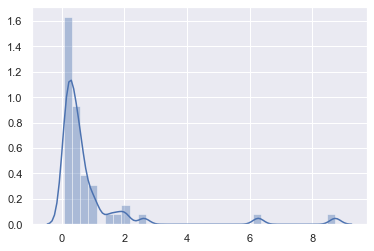

In [112]:
# Check distribution on the average levels of traffic distance buildup
df_grouped_usa_accidents2 = df_usa_accidents.groupby('State').agg({'Distance(mi)': ['mean']})
ax = sns.distplot(df_grouped_usa_accidents2)

* Distribution is skewed right

In [113]:
# Table consisiting of weather conditions to categorize later
usa_boxplot = (df_usa_accidents['Weather_Condition']).str.contains('Rain|Drizzle|Fair|Clear', regex=True)
usa_boxplot1 = df_usa_accidents.iloc[usa_boxplot.values]
usa_boxplot1.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,OH,US,US/Eastern,...,Night,Night,Night,Night,2016-02-08,05:46:00,5,2016-02-08,11:00:00,05:14:00
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,OH,US,US/Eastern,...,Night,Night,Night,Day,2016-02-08,06:07:59,6,2016-02-08,06:37:59,00:30:00
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,0.01,Westerville Rd,Westerville,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-08,07:44:26,7,2016-02-08,08:14:26,00:30:00
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,0.01,Westerville Rd,Westerville,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-08,08:10:04,8,2016-02-08,08:40:04,00:30:00
10,A-11,3,2016-02-08 08:14:42,2016-02-08 08:44:42,0.01,Outerbelt S,Columbus,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-08,08:14:42,8,2016-02-08,08:44:42,00:30:00


In [114]:
# Filter data to only rain/drizzle weather
usa_rain_filter = (df_usa_accidents['Weather_Condition']).str.contains('Rain|Drizzle', regex=True)
usa_rain_accidents = df_usa_accidents.iloc[usa_rain_filter.values]
usa_rain_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,OH,US,US/Eastern,...,Night,Night,Night,Night,2016-02-08,05:46:00,5,2016-02-08,11:00:00,05:14:00
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,OH,US,US/Eastern,...,Night,Night,Night,Day,2016-02-08,06:07:59,6,2016-02-08,06:37:59,00:30:00
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,0.01,Westerville Rd,Westerville,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-08,07:44:26,7,2016-02-08,08:14:26,00:30:00
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,0.01,Westerville Rd,Westerville,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-08,08:10:04,8,2016-02-08,08:40:04,00:30:00
10,A-11,3,2016-02-08 08:14:42,2016-02-08 08:44:42,0.01,Outerbelt S,Columbus,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-08,08:14:42,8,2016-02-08,08:44:42,00:30:00


In [115]:
# Descriptive stats of rainy/drizzle data
usa_rain_accidents.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,213875.000000,213875.000000,213875.000000,213875.000000,213875.000000,213875
mean,2.397709,0.314353,57.384560,5.865877,11.881393,0 days 01:44:40.022686
std,0.546760,1.579847,12.978298,3.254414,5.166328,1 days 04:26:50.747270
min,1.000000,0.000000,-9.000000,0.000000,0.000000,-1 days +23:29:45
25%,2.000000,0.000000,48.000000,3.000000,8.000000,0 days 00:29:41
50%,2.000000,0.000000,57.000000,6.000000,12.000000,0 days 00:44:31
75%,3.000000,0.010000,68.000000,10.000000,16.000000,0 days 01:14:34
max,4.000000,132.499000,111.000000,105.000000,23.000000,369 days 03:59:05


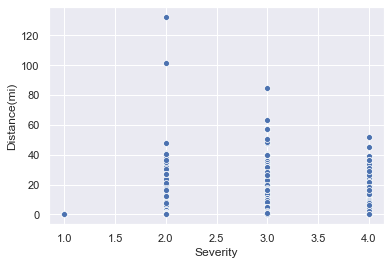

In [116]:
sns.scatterplot(x='Severity', y='Distance(mi)', data=usa_rain_accidents)

In [117]:
# Filter data to only fair/clear weather
usa_clear_filter = (df_usa_accidents['Weather_Condition']).isin(['Fair', 'Clear'])
usa_clear_accidents = df_usa_accidents.iloc[usa_clear_filter.values]
usa_clear_accidents.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration
93,A-94,2,2016-02-11 07:18:39,2016-02-11 07:48:39,0.01,Gender Rd,Canal Winchester,OH,US,US/Eastern,...,Night,Day,Day,Day,2016-02-11,07:18:39,7,2016-02-11,07:48:39,00:30:00
97,A-98,2,2016-02-11 07:53:55,2016-02-11 08:23:55,0.00,Vance Rd,Dayton,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-11,07:53:55,7,2016-02-11,08:23:55,00:30:00
103,A-104,2,2016-02-11 09:16:13,2016-02-11 10:01:13,0.00,Lamme Rd,Dayton,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-11,09:16:13,9,2016-02-11,10:01:13,00:45:00
109,A-110,2,2016-02-11 10:53:56,2016-02-11 11:23:56,0.00,Mall Woods Dr,Dayton,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-11,10:53:56,10,2016-02-11,11:23:56,00:30:00
131,A-132,2,2016-02-13 11:17:01,2016-02-13 12:17:01,0.01,State Route 13,Bellville,OH,US,US/Eastern,...,Day,Day,Day,Day,2016-02-13,11:17:01,11,2016-02-13,12:17:01,01:00:00


In [118]:
# Descriptive stats of fair/clear weather
usa_clear_accidents.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Military_time_bin_filter,Time_Duration
count,1.135981e+06,1.135981e+06,1.135981e+06,1.135981e+06,1.135981e+06,1135981
mean,2.339830e+00,2.689594e-01,6.439320e+01,9.857143e+00,1.230103e+01,0 days 02:02:11.538241
std,5.365250e-01,1.481243e+00,1.874123e+01,1.561936e+00,5.274345e+00,2 days 19:11:35.785520
min,1.000000e+00,0.000000e+00,-3.300000e+01,0.000000e+00,0.000000e+00,-1 days +23:25:55
25%,2.000000e+00,0.000000e+00,5.310000e+01,1.000000e+01,8.000000e+00,0 days 00:29:44
50%,2.000000e+00,0.000000e+00,6.690000e+01,1.000000e+01,1.200000e+01,0 days 00:44:40
75%,3.000000e+00,1.000000e-02,7.810000e+01,1.000000e+01,1.700000e+01,0 days 01:14:51
max,4.000000e+00,3.336300e+02,1.706000e+02,1.400000e+02,2.300000e+01,1061 days 02:53:22


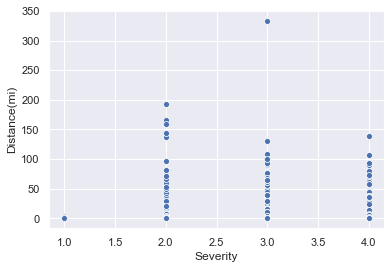

In [119]:
sns.scatterplot(x='Severity', y='Distance(mi)', data=usa_clear_accidents)

#### Null Hypothesis (H0): There is no difference in average accident severity between rain/drizzle and fair/clear weather accross the USA

#### Alternative Hypothesis (H1): There is a difference in average accident severity between rain/drizzle and fair/clear weather accross the USA

In [120]:
# Run a two sample t test on the two groups of data pertaining to severity
stats.ttest_ind(usa_rain_accidents['Severity'], usa_clear_accidents['Severity'], equal_var = False)

Ttest_indResult(statistic=45.04310164309779, pvalue=0.0)

* p value < .05: Reject the Null. Accept the alternative.

#### Null Hypothesis (H0): There is no difference in average traffic distance buildup between raining/drizzle weather or fair/clear weather based accidents accross the USA

#### Alternative Hypothesis (H1): There is a difference in average traffic distance buildup between raining/drizzle weather or fair/clear weather based accidents accross the USA

In [121]:
# Run a two sample t test on the two groups of data pertaining to traffic distance buildup
stats.ttest_ind(usa_rain_accidents['Distance(mi)'], usa_clear_accidents['Distance(mi)'], equal_var = False)

Ttest_indResult(statistic=12.308480042393741, pvalue=8.320056760065615e-35)

* p value < .05: Reject the Null. Accept the alternative.

In [122]:
# Pearson r correlation test to check possible correlation between severity and traffic distance buildup pertaining to clear weather
stats.pearsonr(usa_clear_accidents['Severity'], usa_clear_accidents['Distance(mi)'])

(0.15569513497604415, 0.0)

* No correlation

In [123]:
# # Pearson r correlation test to check possible correlation between severity and traffic distance buildup pertaining to rainy weather
stats.pearsonr(usa_rain_accidents['Severity'], usa_rain_accidents['Distance(mi)'])

(0.13420954002532445, 0.0)

* No correlation

In [124]:
#String match "Fair, Clear, Fair / Windy, Rain, Light Rain, Heavy Rain, etc" into 2 buckets
usa_boxplot1['Rain_NotRain_Filter'] = np.where(usa_boxplot1['Weather_Condition'].str.contains('Fair|Clear'), 'Not Rain', 'Rain')
usa_boxplot1.head()

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,City,State,Country,Timezone,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Date_Start,Time_Start,Military_time_bin_filter,Date_End,Time_End,Time_Duration,Rain_NotRain_Filter
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,I-70 E,Dayton,OH,US,US/Eastern,...,Night,Night,Night,2016-02-08,05:46:00,5,2016-02-08,11:00:00,05:14:00,Rain
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Brice Rd,Reynoldsburg,OH,US,US/Eastern,...,Night,Night,Day,2016-02-08,06:07:59,6,2016-02-08,06:37:59,00:30:00,Rain
5,A-6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,0.01,Westerville Rd,Westerville,OH,US,US/Eastern,...,Day,Day,Day,2016-02-08,07:44:26,7,2016-02-08,08:14:26,00:30:00,Rain
9,A-10,3,2016-02-08 08:10:04,2016-02-08 08:40:04,0.01,Westerville Rd,Westerville,OH,US,US/Eastern,...,Day,Day,Day,2016-02-08,08:10:04,8,2016-02-08,08:40:04,00:30:00,Rain
10,A-11,3,2016-02-08 08:14:42,2016-02-08 08:44:42,0.01,Outerbelt S,Columbus,OH,US,US/Eastern,...,Day,Day,Day,2016-02-08,08:14:42,8,2016-02-08,08:44:42,00:30:00,Rain


Text(0.5, 0, 'Not Raining Vs. Raining')

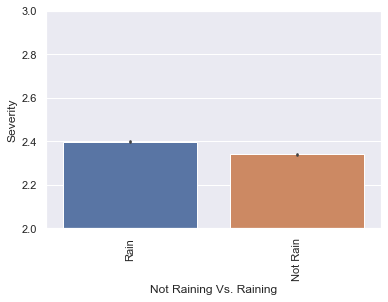

In [125]:
# Bar graph of the avg level of severity in car accidents caused by fair/clear weather vs. rain/drizzle weather
ax = sns.barplot(y="Severity", x='Rain_NotRain_Filter', data=usa_boxplot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(2,3)
ax.set_xlabel("Not Raining Vs. Raining")

Text(0.5, 0, 'Not Raining Vs. Raining')

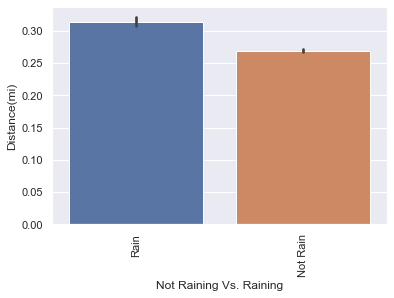

In [126]:
# Bar graph of the avg level of severity in car accidents caused by fair/clear weather vs. rain/drizzle weather
ax = sns.barplot(y="Distance(mi)", x='Rain_NotRain_Filter', data=usa_boxplot1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Not Raining Vs. Raining")

* Average severity and traffic distance build up are higher during rain like whether conditions throughout the U.S. as a whole